### Lending Club Loan Dataset Description
-	loan_amnt-The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
-	term-The number of payments on the loan. Values are in months and can be either 36 or 60.
-	int_rate-Interest Rate on the loan
-	installment-The monthly payment owed by the borrower if the loan originates.
-	grade-LC assigned loan grade
-	sub_grade-LC assigned loan subgrade
-	emp_title-The job title supplied by the Borrower when applying for the loan.*
-	emp_length-Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
-	home_ownership-The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
-	annual_inc-The self-reported annual income provided by the borrower during registration.
-	verification_status-Indicates if income was verified by LC, not verified, or if the income source was verified
-	issue_d-The month which the loan was funded
-	loan_status-Current status of the loan
-	purpose	-A category provided by the borrower for the loan request.
-	title-The loan title provided by the borrower
-	zip_code-The first 3 numbers of the zip code provided by the borrower in the loan application.
-	addr_state-The state provided by the borrower in the loan application
-	dti (Debt to income ratio)-A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
-	earliest_cr_line-The month the borrower's earliest reported credit line was opened
-	open_acc-The number of open credit lines in the borrower's credit file.
-	pub_rec-Number of derogatory public records
-	revol_bal-Total credit revolving balance
-	revol_util-Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
-	total_acc-The total number of credit lines currently in the borrower's credit file
-	initial_list_status-The initial listing status of the loan. Possible values are – W, F
-	application_type-Indicates whether the loan is an individual application or a joint application with two co-borrowers
-	mort_acc-Number of mortgage accounts.
-	pub_rec_bankruptcies-Number of public record bankruptcies

In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [150]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
data=pd.read_csv("lending_club_loan_two.csv")
data.shape

(396030, 27)

In [152]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [153]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [154]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


### Report
- The maximum value of DTI ratio ,revolving_utilzation highlights that some borrowers have a higher debt as compared to their income more chances of default.
- The maximum value of mort_acc,total_acc,public_rec_bankrupties increases the borrowers chances to default.

In [155]:
data.loan_status.value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

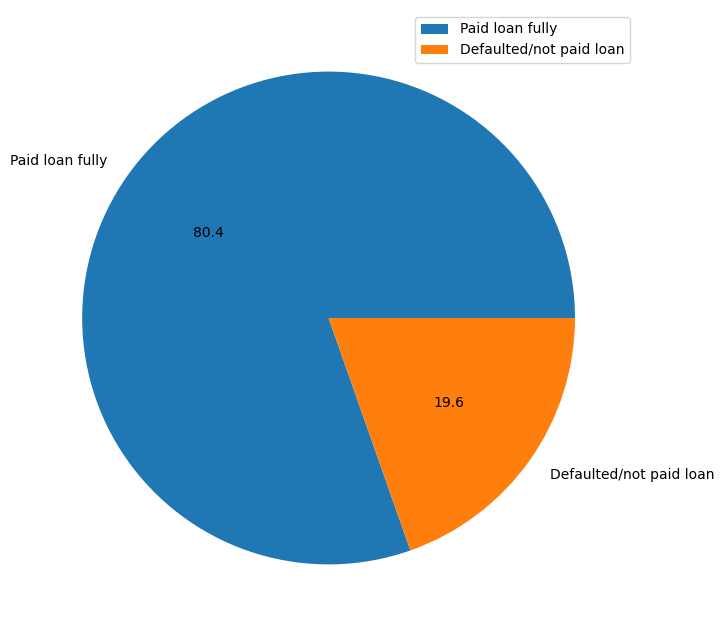

In [156]:
#here laon_status is the traget feature haveing two value Fully Paid -no default , Charged Off - default loan
value=data.loan_status.value_counts()
label=["Paid loan fully", "Defaulted/not paid loan"]
plt.figure(figsize=(10,8))
plt.pie(value,labels=label,autopct="%0.1f")
plt.legend()

In [157]:
# here we have converyed the two categories of our class labels to numerical(label encoded type) to fu=inds its correlation with the numerical values
data["loan_status_numerical"]=data.loan_status.replace({"Fully Paid":0,"Charged Off":1})
data.loan_status_numerical

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: loan_status_numerical, Length: 396030, dtype: int64

In [158]:
#here we di vide the features bassed on their data types into categorical and numerical
categorical=[features for features in data.columns if data[features].dtype=="O"]
numerical=[features for features in data.columns if data[features].dtype!="O"]
numerical

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'loan_status_numerical']

<Axes: >

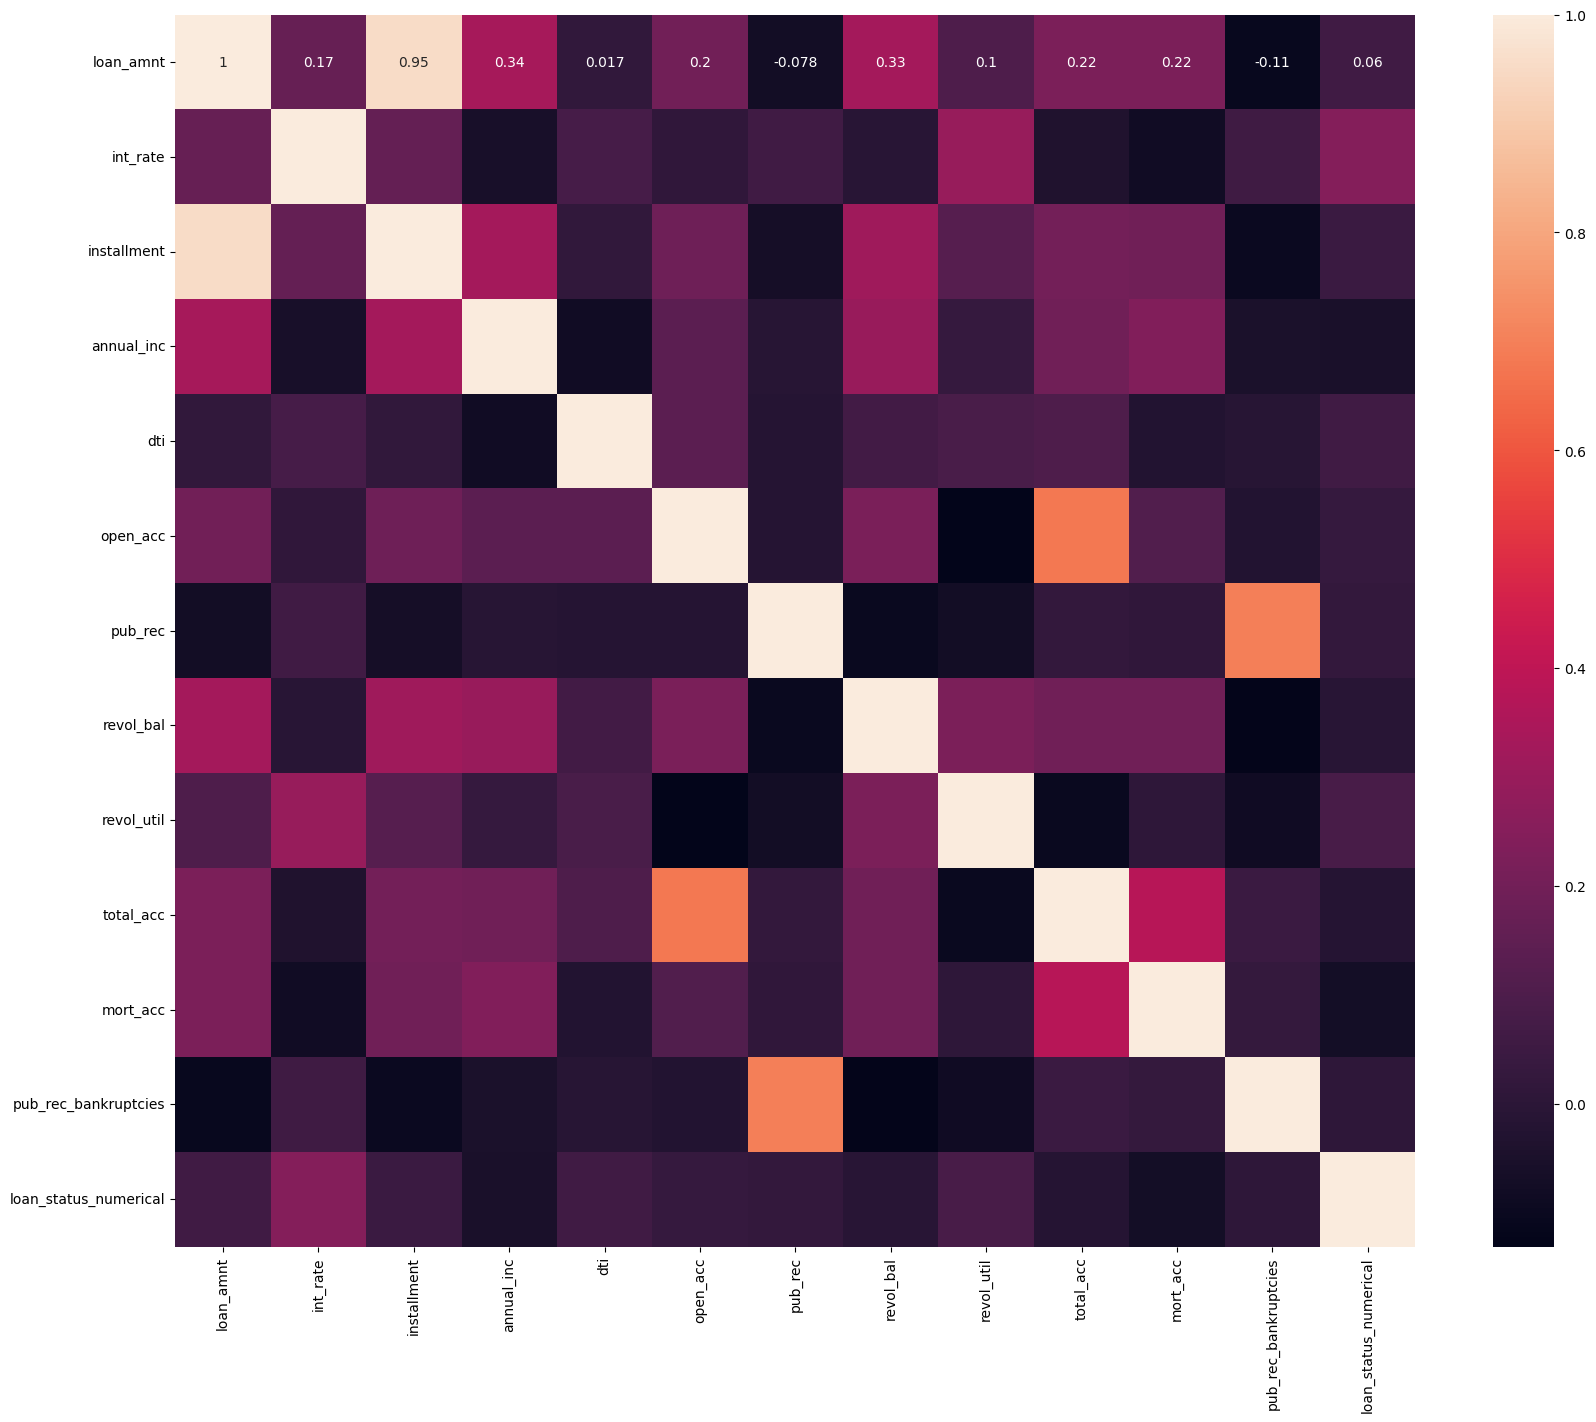

In [159]:
#this is the correlation plot to see the relation between the target feature and numerical features
plt.figure(figsize=(20,16))
sns.heatmap(data[numerical].corr(),annot=True)

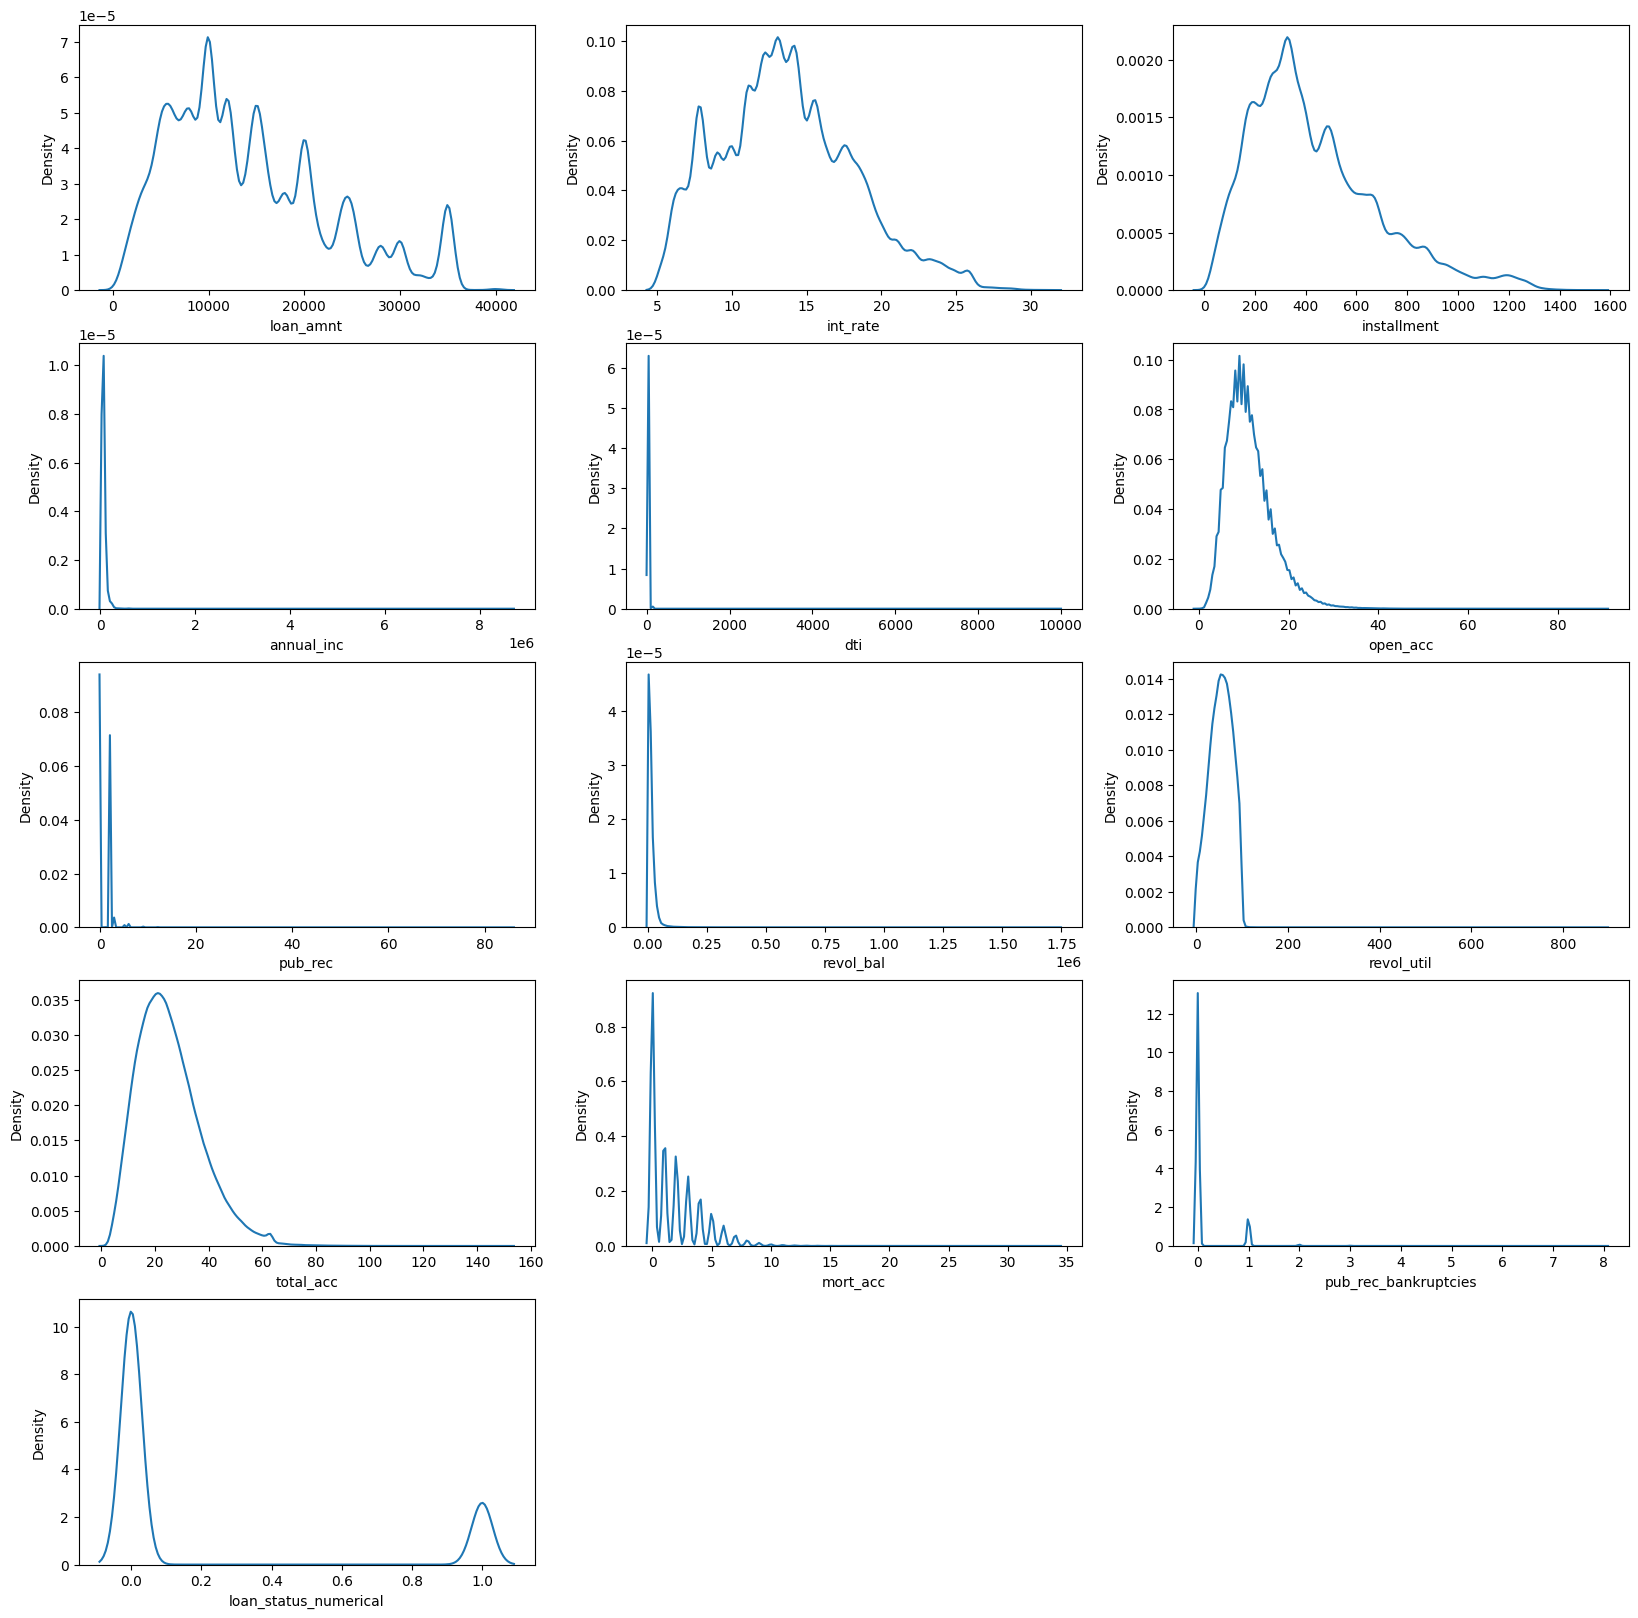

In [160]:
#this is the distribution of the numerical variables/features of the dataset
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical,1):
    plt.subplot(5, 3, i) 
    sns.kdeplot(data[col])
    plt.xlabel(col)

In [161]:
categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

<Axes: xlabel='term', ylabel='count'>

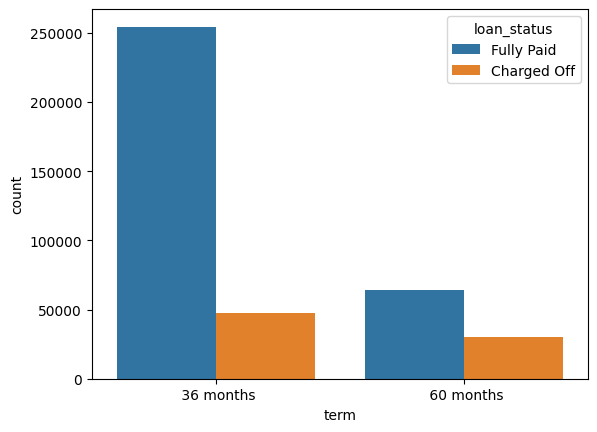

In [162]:
#this plot represent the number of loans taken for a particular tenure/term its default count.
sns.countplot(x=data.term,hue=data.loan_status)

### Report
- Here majority of the people have taken loan for 36 months.
- The percent of loan defaulters for the 36 months loan tenure is higher.

<Axes: xlabel='grade', ylabel='count'>

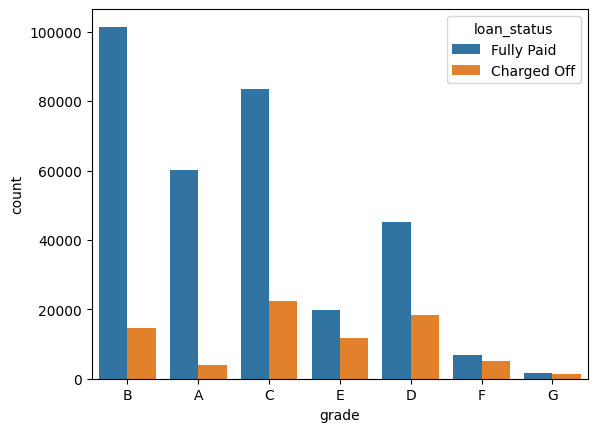

In [163]:
# this plot represents the count of grades assigned to the borowwers with their loan defaults per grade.
sns.countplot(x=data.grade,hue=data.loan_status)

In [164]:
pd.crosstab(data.loan_status,data.grade,margins=True)

grade,A,B,C,D,E,F,G,All
loan_status,,,,,,,,
Charged Off,4036,14587,22449,18338,11765,5037,1461,77673
Fully Paid,60151,101431,83538,45186,19723,6735,1593,318357
All,64187,116018,105987,63524,31488,11772,3054,396030


### Report 
- The population of **G grade** is the minority of borrowers and accounts for **47.48%** of its population to default loan.
- The **C grade** borrowers accounts for **28.9%** of total loan defaults followed by D,B so on.
- The **B grade** borrowers accounts for the majority of the borrowers followed by C,A so on.

<Axes: xlabel='sub_grade', ylabel='count'>

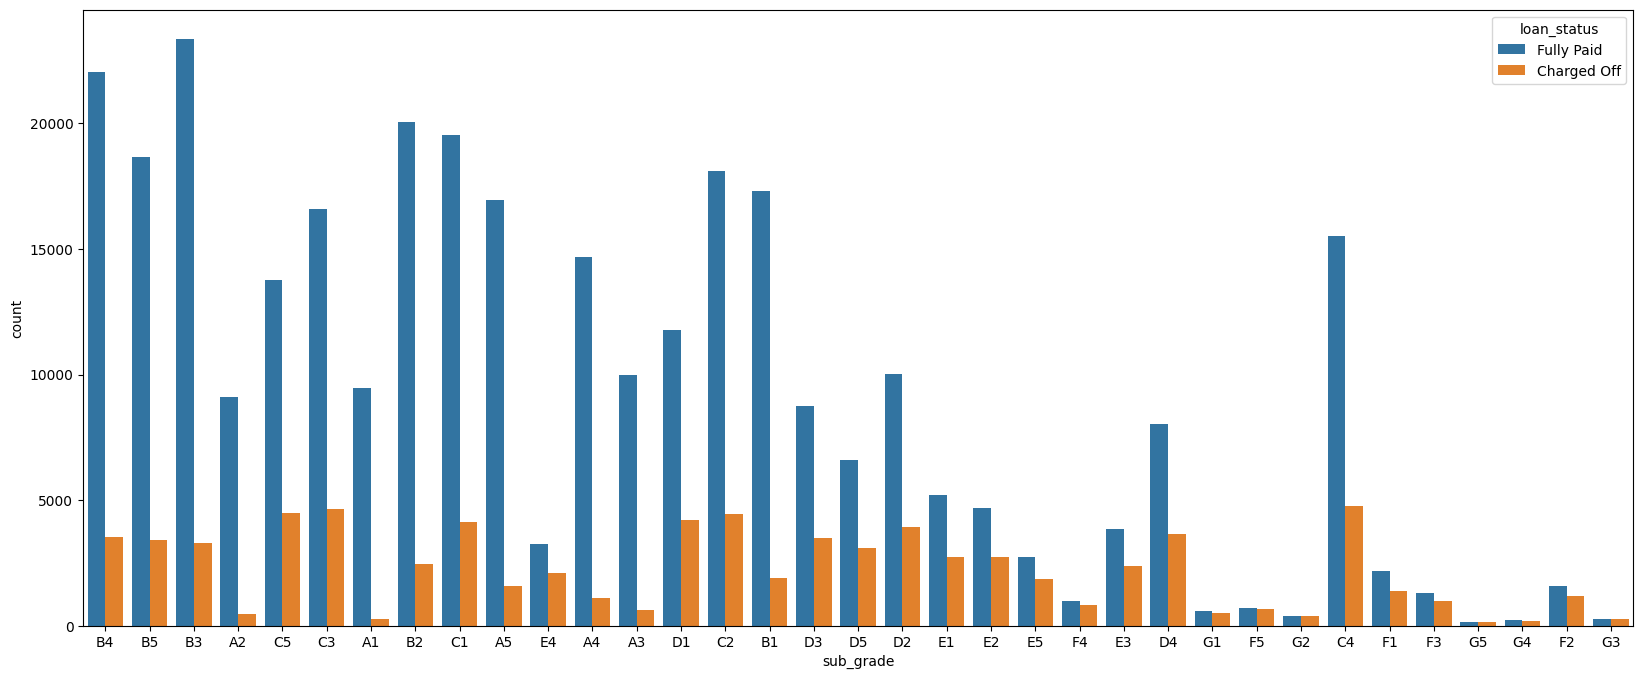

In [165]:
# this plot represents the count of sub-grades assigned to the borowwers with their loan defaults per sub-grade.
plt.figure(figsize=(20,8))
sns.countplot(x=data.sub_grade,hue=data.loan_status)

In [166]:
# It represents top20 employeer titles
top20_emp_title=data.groupby("emp_title")["loan_status"].count().sort_values(ascending=False).head(20)
top20_emp_title

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: loan_status, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Teacher'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Registered Nurse'),
  Text(3, 0, 'RN'),
  Text(4, 0, 'Supervisor'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Project Manager'),
  Text(7, 0, 'Owner'),
  Text(8, 0, 'Driver'),
  Text(9, 0, 'Office Manager'),
  Text(10, 0, 'manager'),
  Text(11, 0, 'Director'),
  Text(12, 0, 'General Manager'),
  Text(13, 0, 'Engineer'),
  Text(14, 0, 'teacher'),
  Text(15, 0, 'driver'),
  Text(16, 0, 'Vice President'),
  Text(17, 0, 'Operations Manager'),
  Text(18, 0, 'Administrative Assistant'),
  Text(19, 0, 'Accountant')])

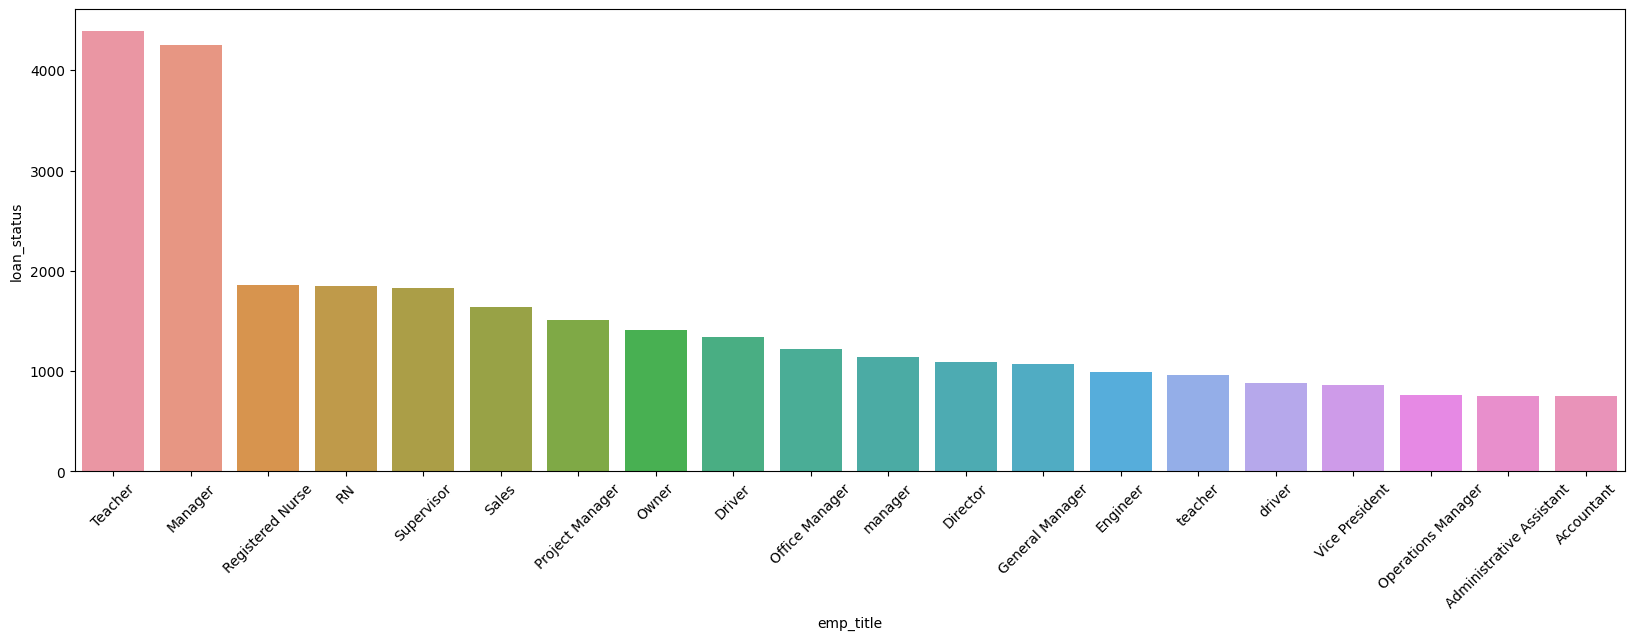

In [167]:
#this plot represents the count of top 20 emplyeers title
plt.figure(figsize=(20,6))
sns.barplot(x=top20_emp_title.index,y=top20_emp_title)
plt.xticks(rotation=45)

In [168]:
#this represents the percent of borrowers who defaulted loan for th top 20 employee title
for i in range(top20_emp_title.shape[0]):
    emp = top20_emp_title.index[i] 
    total = data[data.emp_title == emp].shape[0]
    charged_off = data[(data.emp_title == emp) & (data.loan_status == "Charged Off")].shape[0]
    frac = charged_off / total
    print(f"{emp} | {frac:.2f} | {charged_off}")


Teacher | 0.20 | 857
Manager | 0.22 | 929
Registered Nurse | 0.20 | 380
RN | 0.21 | 379
Supervisor | 0.22 | 405
Sales | 0.24 | 399
Project Manager | 0.16 | 246
Owner | 0.32 | 456
Driver | 0.28 | 378
Office Manager | 0.20 | 248
manager | 0.28 | 326
Director | 0.16 | 173
General Manager | 0.23 | 249
Engineer | 0.15 | 150
teacher | 0.21 | 206
driver | 0.32 | 283
Vice President | 0.13 | 112
Operations Manager | 0.17 | 129
Administrative Assistant | 0.22 | 163
Accountant | 0.16 | 122


### Report
- Here teachers and managers accounts for the majority of the borrowers based on employeers title.
- They combinely account for **2.2%** of their respective population loan defaults.
- Lending club needs to be more careful with borrower population which is more likely to default a loan like Owners,Drivers.

<Axes: xlabel='emp_length', ylabel='count'>

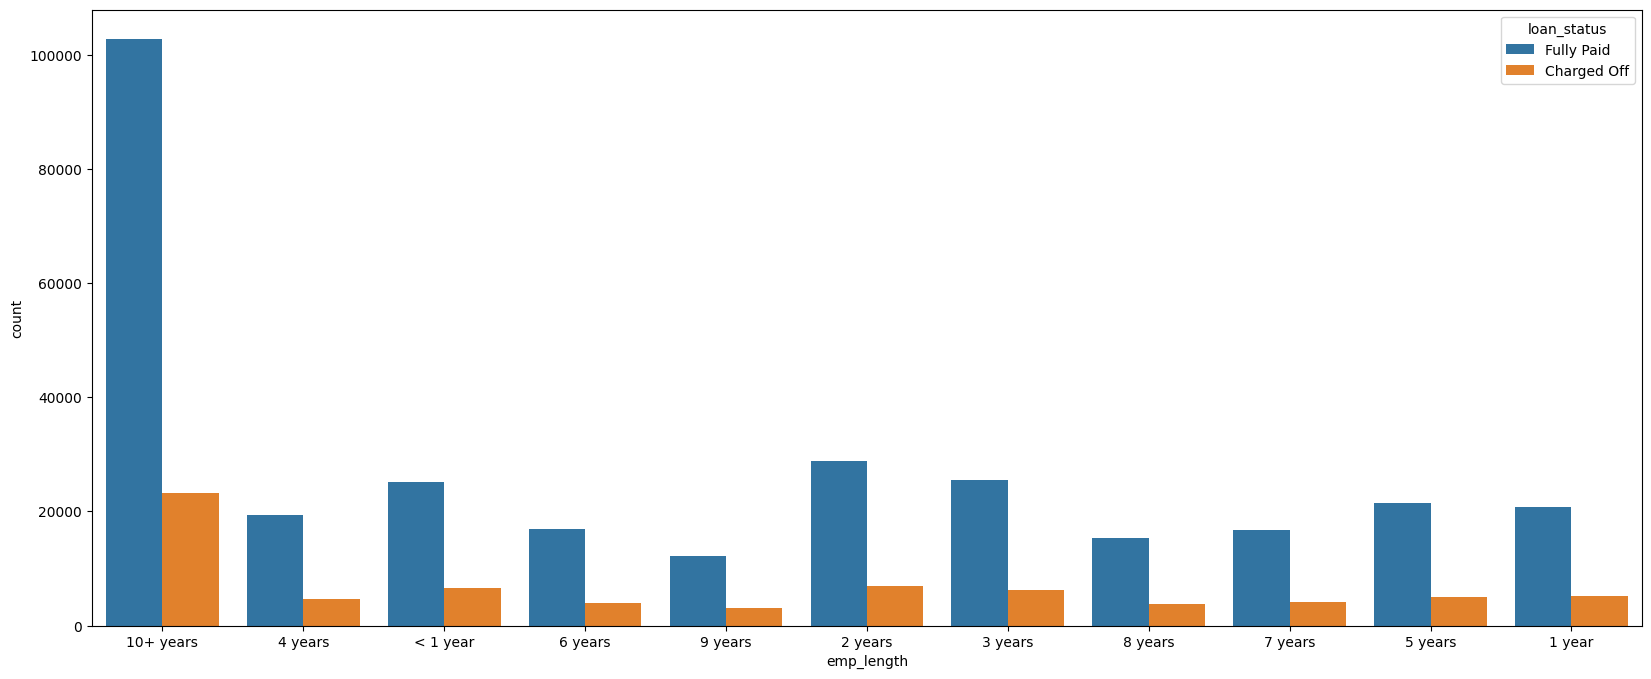

In [169]:
#this represents the count of employee length of the borrowers and default loans.
plt.figure(figsize=(20,8))
sns.countplot(x=data.emp_length,hue=data.loan_status)

In [170]:
pd.crosstab(data.loan_status,data.emp_length,margins=True)

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,All
loan_status,,,,,,,,,,,,
Charged Off,5154,23215,6924,6182,4608,5092,3943,4055,3829,3070,6563,72635
Fully Paid,20728,102826,28903,25483,19344,21403,16898,16764,15339,12244,25162,305094
All,25882,126041,35827,31665,23952,26495,20841,20819,19168,15314,31725,377729


### Report
- The borrowers with 10+ years of working experience are the majority and the account for **32%** of loan defaults followed by the 2 years ,freash employeers so on.
- The borrowers with 9 years of working experience has the least population and they account for **4.23%** of loan defaults followed by 6 years.

<Axes: xlabel='home_ownership', ylabel='count'>

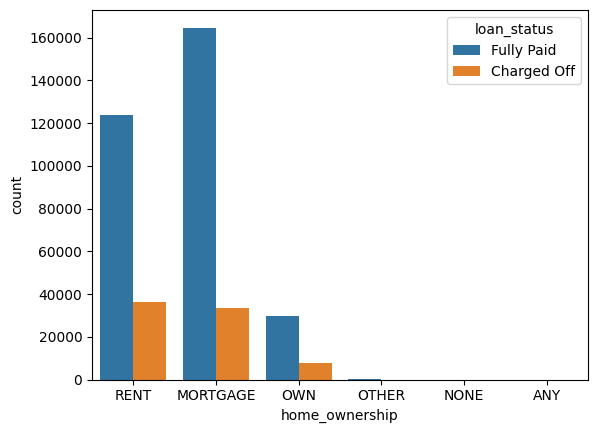

In [171]:
#this chart represents the home ownership of the borrowers with their default loan count.
sns.countplot(x=data.home_ownership,hue=data.loan_status)

In [172]:
pd.crosstab(data.loan_status,data.home_ownership,margins=True)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,All
loan_status,,,,,,,
Charged Off,0,33632,7,16,7806,36212,77673
Fully Paid,3,164716,24,96,29940,123578,318357
All,3,198348,31,112,37746,159790,396030


### Report
- **Majority** of the borrowers have **mortgage** their house and they account for **43.3%** of the total loan defaults followed by rent and own.
- The borrowers having their own house have less chances of default as compared to mortgage and rent.
- Borrowers with rent home_ownership account for **46.6%** of total loan defaults.
- The lending club needs to be more *careful* with borrowers having **mortgage or rent home ownership** as they combinely account for **89.9%** of total default loans.

<Axes: xlabel='verification_status', ylabel='count'>

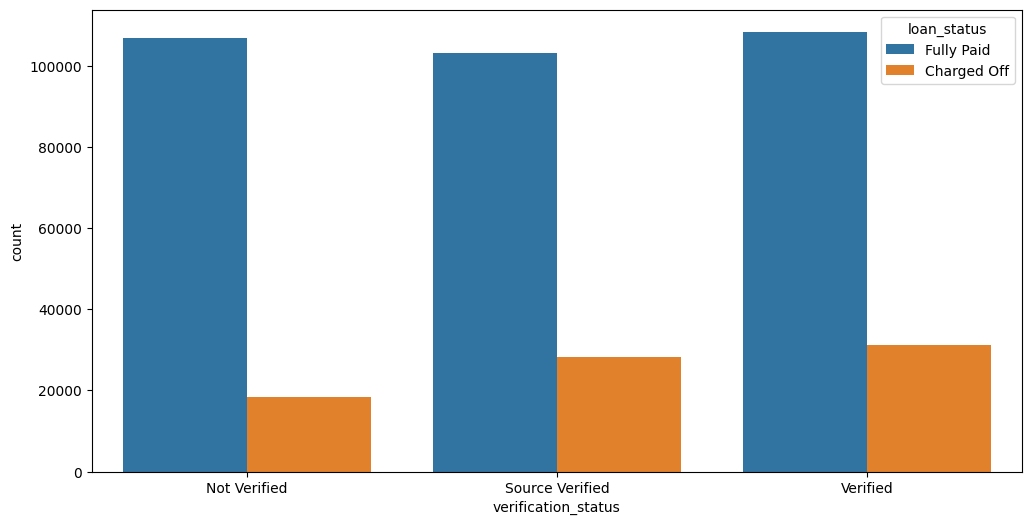

In [173]:
#this chart represents the verification of the borrowers with their default loan count.
plt.figure(figsize=(12,6))
sns.countplot(x=data.verification_status,hue=data.loan_status)

In [174]:
pd.crosstab(data.loan_status,data.verification_status,margins=True)

verification_status,Not Verified,Source Verified,Verified,All
loan_status,,,,
Charged Off,18307,28214,31152,77673
Fully Paid,106775,103171,108411,318357
All,125082,131385,139563,396030


### Report
- Lending Club has not verified the income of **33.89%** of the borrowers which is very risky they account for **23.57%** of total loan defaults.
- LC should ensure the Income verification is done for all borrowers as it could reduce the risk of loan defaults.
- LC has verified the income of **35.24%** of its borrowers but they account for **40.11%** of total loan defaults which is even higher than Unverified borrowers.
- LC should be more *careful* with  **Verified and Source Verified borrowers** as they account for **76.43%** of total loan defaults.

In [175]:
# here the isue_d column had values like "jan-2024" so here i extracted the year and the month at which the loan was funded
month=[]
year=[]
for i in range(data.shape[0]):
    month.append(data.issue_d[i].split("-")[0])
    year.append(data.issue_d[i].split("-")[1])

In [176]:
# creating two new feature for month and year at which loan is funded.
data["issue_month"]=month
data["issue_year"]=year
data.issue_month.shape,data.issue_month.head(),data.issue_year.shape,data.issue_year.head()

((396030,),
 0    Jan
 1    Jan
 2    Jan
 3    Nov
 4    Apr
 Name: issue_month, dtype: object,
 (396030,),
 0    2015
 1    2015
 2    2015
 3    2014
 4    2013
 Name: issue_year, dtype: object)

<Axes: xlabel='issue_month', ylabel='count'>

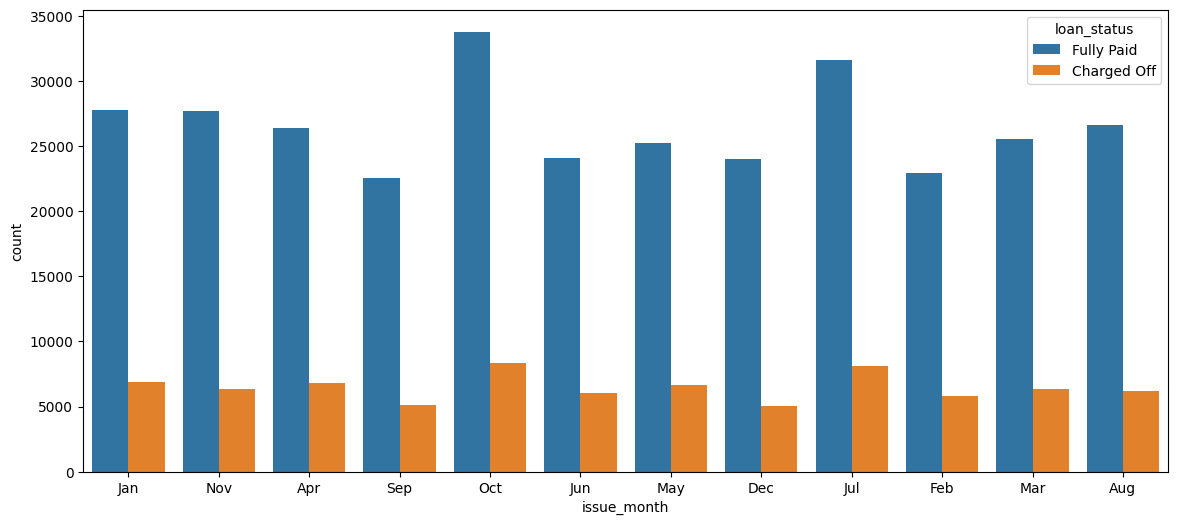

In [177]:
# this is monthly count of loans funded by the LC with the number of loan defaults
plt.figure(figsize=(14,6))
sns.countplot(x=data.issue_month,hue=data.loan_status)

In [178]:
pd.crosstab(data.loan_status,data.issue_month,margins=True)

issue_month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,All
loan_status,,,,,,,,,,,,,
Charged Off,6828,6196,5043,5791,6895,8110,6066,6337,6638,6351,8323,5095,77673
Fully Paid,26395,26620,24039,22951,27787,31604,24074,25582,25257,27717,33807,22524,318357
All,33223,32816,29082,28742,34682,39714,30140,31919,31895,34068,42130,27619,396030


### Report
- Highest number of loans are funded in the month of October and it accounts for the highest number of loan default(**19.75%**) in a month.
- Lowest number of loans is funded in the month of September and it accounts for second lowest number of loan default(**18.44%**) in a month.
- All three quaters of the year have almost equal number of loan defaults.

<Axes: xlabel='issue_year', ylabel='count'>

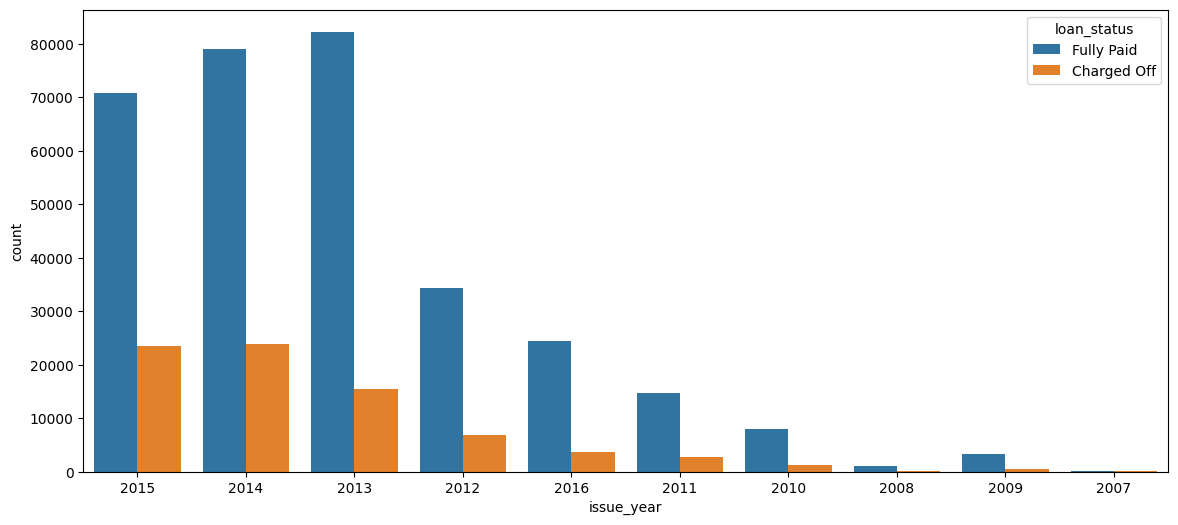

In [179]:
#this is the yeraly count of loans funded by the LC with the numer of loan defaults
plt.figure(figsize=(14,6))
sns.countplot(x=data.issue_year,hue=data.loan_status)

In [180]:
pd.crosstab(data.loan_status,data.issue_year,margins=True)

issue_year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
loan_status,,,,,,,,,,,
Charged Off,32,196,469,1223,2658,6790,15372,23772,23473,3688,77673
Fully Paid,163,1044,3357,8035,14777,34412,82290,79088,70791,24400,318357
All,195,1240,3826,9258,17435,41202,97662,102860,94264,28088,396030


### Report
- LC funded maximum nuber of loans in the year **(2013,2014,2015)**.
- These years only account for maximum number of total loan default **80.62%**.
- LC company should analyse these years data properly as it's analysis improved company situation in 2016.

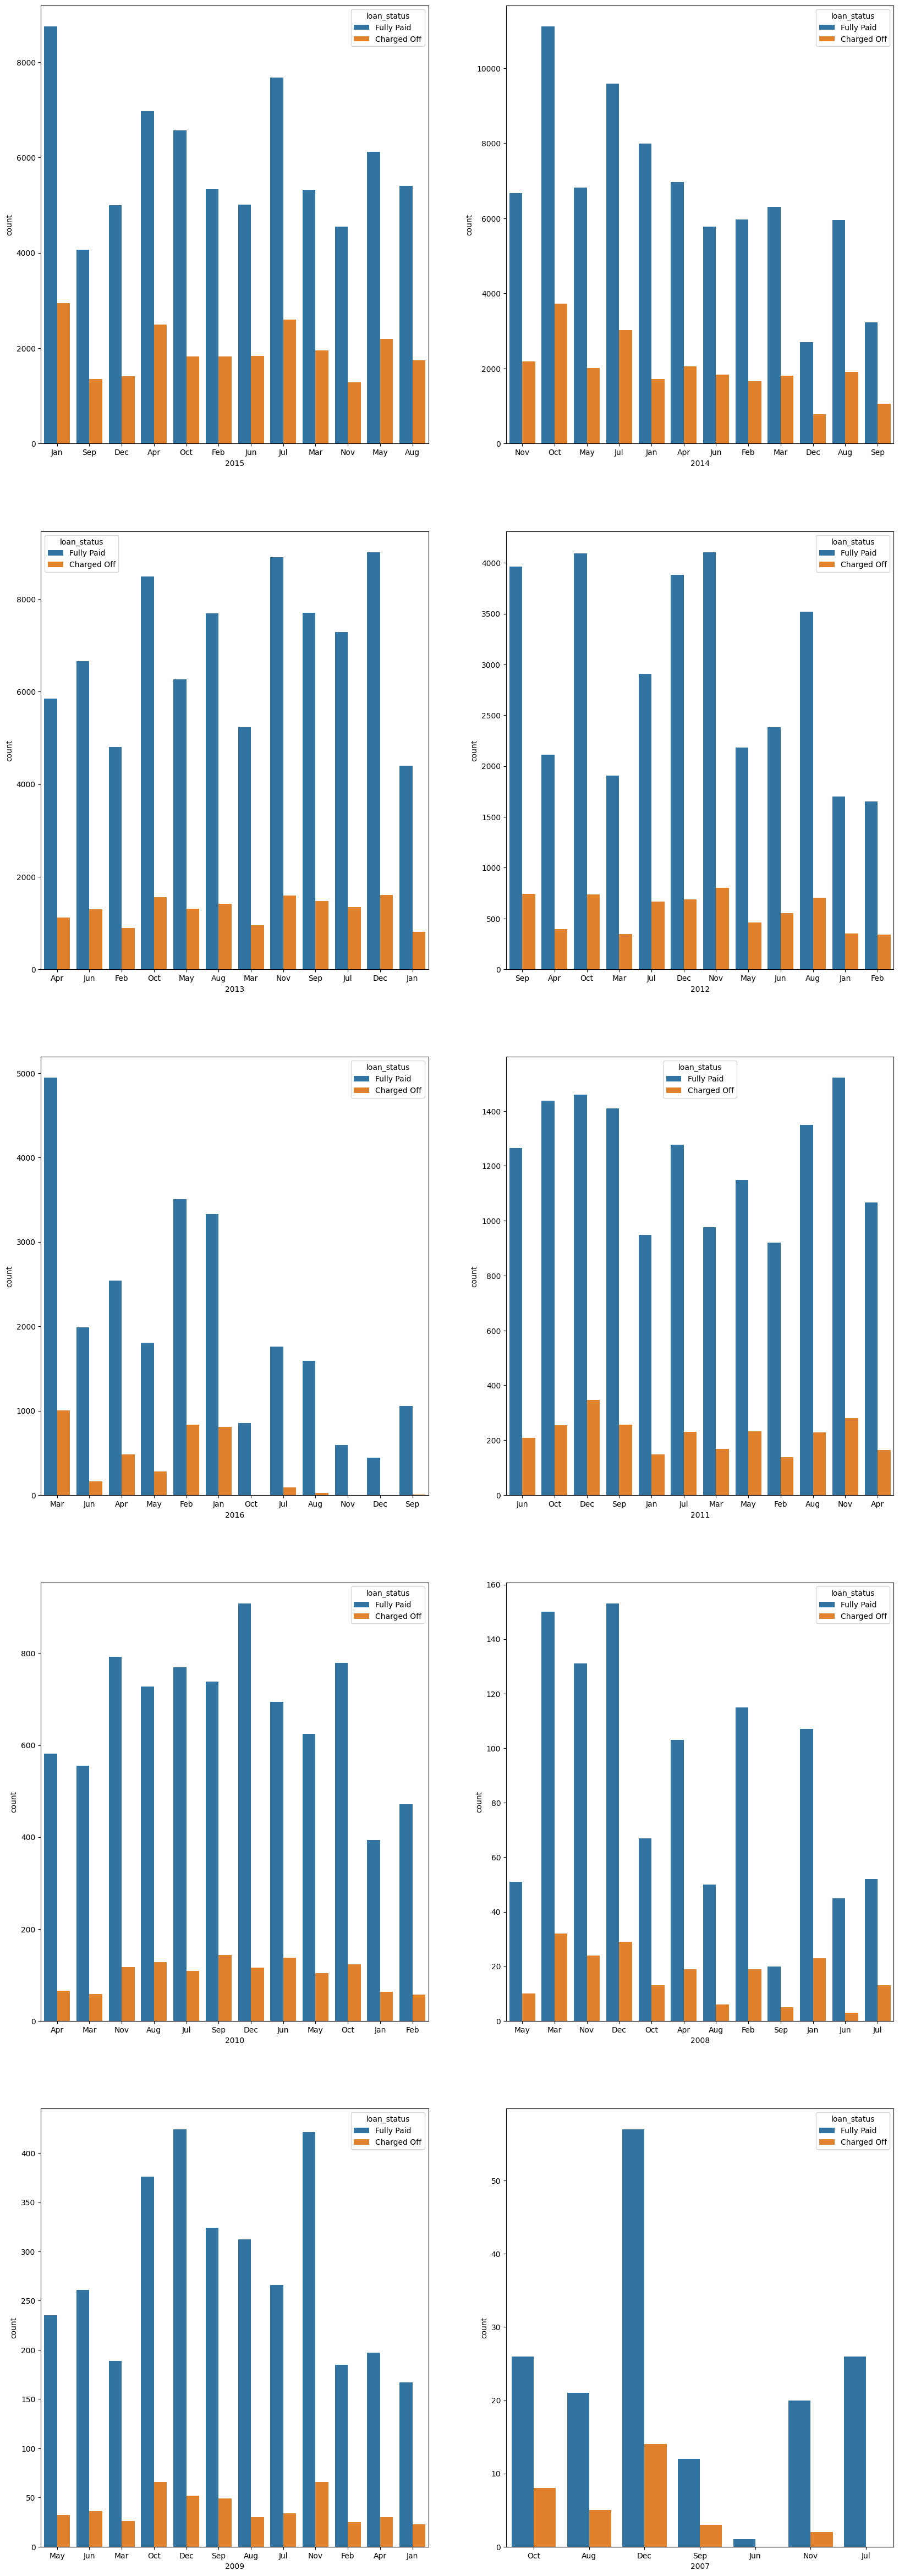

In [181]:
# this is monthly number of Loans funded by the LC with their defaults year-wise.
plt.figure(figsize=(20,60))
for i in range(data.issue_year.nunique()):
    plt.subplot(5,2,i+1)
    year=data.issue_year.unique()[i]
    filter_by_year=data[data.issue_year==year]
    sns.countplot(x=filter_by_year.issue_month,hue=data.loan_status)
    plt.xlabel(year)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'vacation'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'other'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'car'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'house'),
  Text(12, 0, 'educational'),
  Text(13, 0, 'renewable_energy')])

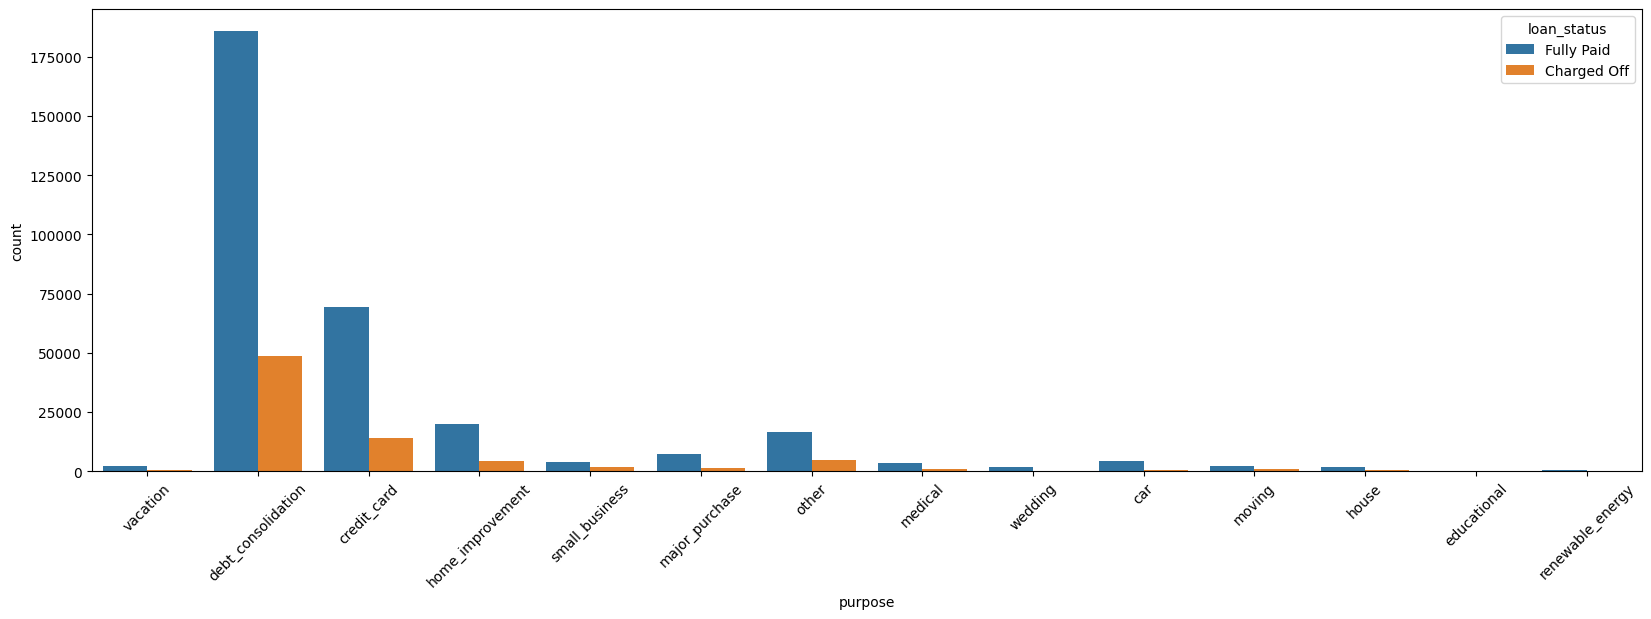

In [182]:
#this plot represents the purpose of the loan and the count of loan default for every purpose
plt.figure(figsize=(20,6))
sns.countplot(x=data.purpose,hue=data.loan_status)
plt.xticks(rotation=45)

In [183]:
pd.crosstab(data.loan_status,data.purpose,margins=True)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,All
loan_status,,,,,,,,,,,,,,,
Charged Off,633,13874,48640,42,4087,434,1448,911,670,4495,77,1679,464,219,77673
Fully Paid,4064,69145,185867,215,19943,1767,7342,3285,2184,16690,252,4022,1988,1593,318357
All,4697,83019,234507,257,24030,2201,8790,4196,2854,21185,329,5701,2452,1812,396030


### Report
- Maximum numbers of loans **59.21%** are taken for debt_consolidation purpose followed by credit card and home improvement.
- Maximum number of loan defaults also occured for debt_consolidation purpose **62.62%** of total loan defaults.
- LC should be more careful when a borrower borrows a loan for debt_consolidation purpose.
- Education is the least purpose for which the loan is borrowed and its loan default is also lowest making it the most safest purpose for lending loans.

In [184]:
#I have renamed the title columns to loan_title 
data.rename(columns={"title":"loan_title"},inplace=True)
data.loan_title.head()


0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: loan_title, dtype: object

In [185]:
#Here i removed the top 20 loan_titles
top20_loan_title=data.groupby("loan_title")["loan_status"].count().sort_values(ascending=False).head(20)
top20_loan_title

loan_title
Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: loan_status, dtype: int64

In [186]:
# data["loan_title"]=data.loan_title.apply(lambda x:x if count[x]>5 else "Other")
# #Here i was trying to replace less frequent values with others but it was already prsesent "Other"

In [187]:
# here i am replacing values with same meaning but written in a different manner
data.loan_title.replace(["credit card payoff"],"credit_card_consolidation",inplace=True)

In [188]:
top20_loan_title=data.groupby("loan_title")["loan_status"].count().sort_values(ascending=False).head(20)
top20_loan_title

loan_title
Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: loan_status, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Debt consolidation'),
  Text(1, 0, 'Credit card refinancing'),
  Text(2, 0, 'Home improvement'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Debt Consolidation'),
  Text(5, 0, 'Major purchase'),
  Text(6, 0, 'Consolidation'),
  Text(7, 0, 'debt consolidation'),
  Text(8, 0, 'Business'),
  Text(9, 0, 'Debt Consolidation Loan'),
  Text(10, 0, 'Medical expenses'),
  Text(11, 0, 'Car financing'),
  Text(12, 0, 'Credit Card Consolidation'),
  Text(13, 0, 'Vacation'),
  Text(14, 0, 'Moving and relocation'),
  Text(15, 0, 'consolidation'),
  Text(16, 0, 'Personal Loan'),
  Text(17, 0, 'Consolidation Loan'),
  Text(18, 0, 'Home Improvement'),
  Text(19, 0, 'Home buying')])

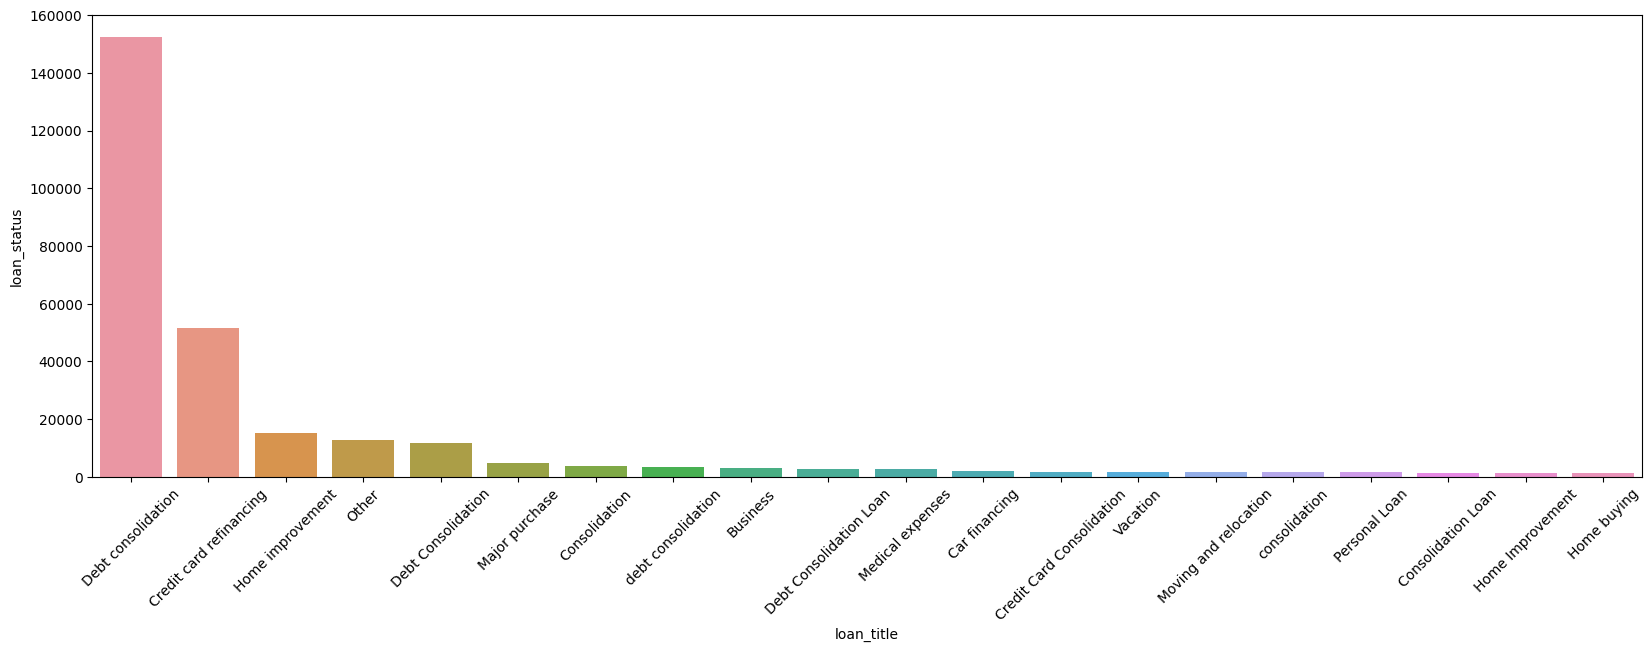

In [189]:
#Here i am plotting the top 20 loan titles bar chart
plt.figure(figsize=(20,6))
sns.barplot(x=top20_loan_title.index,y=top20_loan_title)
plt.xticks(rotation=45)

In [190]:
#this represents the percent of borrowers who defaulted loan for th top 20 loan title
for i in range(top20_loan_title.shape[0]):
    loan_title = top20_loan_title.index[i] 
    total = data[data.loan_title == loan_title].shape[0]
    charged_off = data[(data.loan_title == loan_title) & (data.loan_status == "Charged Off")].shape[0]
    frac = charged_off / total
    print(f"{loan_title} | {frac:.2f} | {charged_off}")

Debt consolidation | 0.23 | 35088
Credit card refinancing | 0.19 | 9927
Home improvement | 0.19 | 2899
Other | 0.23 | 3031
Debt Consolidation | 0.15 | 1730
Major purchase | 0.20 | 972
Consolidation | 0.14 | 550
debt consolidation | 0.20 | 720
Business | 0.33 | 959
Debt Consolidation Loan | 0.15 | 434
Medical expenses | 0.25 | 675
Car financing | 0.16 | 352
Credit Card Consolidation | 0.11 | 193
Vacation | 0.21 | 352
Moving and relocation | 0.28 | 474
consolidation | 0.18 | 288
Personal Loan | 0.14 | 224
Consolidation Loan | 0.13 | 163
Home Improvement | 0.15 | 188
Home buying | 0.24 | 279


### Report
- Borrowers borrow loans for majority of loans for **debt consolidation, cerdit card consolidation and home improvement**.
- The debt_colection and credit_card_consolidation are two of the majority loan titles for default.
- It follows trend similar to **purpose** feature of the dataset.

In [191]:
#Here i was exploring the earliest_cr_line column
data.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [192]:
#Here i have extracted the year in which the credit line was opened from the earliest_cr_line column
data["credit_line_open_year"]=data.earliest_cr_line.str.split("-").str[1]

In [193]:
data.groupby("credit_line_open_year")["loan_status"].count().sort_values(ascending=False).head(20)

credit_line_open_year
2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
1998    22745
2004    20914
1997    18761
1996    18413
2005    17401
1995    16964
1994    15440
2006    15119
1993    12124
2007    11313
1992     8891
1990     8542
1991     8127
1989     7623
2008     7098
Name: loan_status, dtype: int64

In [194]:
pd.crosstab(data.loan_status,data.credit_line_open_year,margins=True)

credit_line_open_year,1944,1948,1950,1951,1953,1954,1955,1956,1957,1958,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,All
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,1,0,0,1,0,0,3,3,2,4,...,3747,3396,2616,1703,1022,861,577,183,6,77673
Fully Paid,0,1,3,2,2,4,6,4,5,8,...,13654,11723,8697,5395,2852,2295,1556,608,93,318357
All,1,1,3,3,2,4,9,7,7,12,...,17401,15119,11313,7098,3874,3156,2133,791,99,396030


### Report
- The oldest credit account was opened in **1994** and the newest credit account is opened in **2013**.
- The top 20 credit accounts were opened between the year **(1990-2008)**.

In [195]:
#Here i have extracted the month in which the credit line was opened from the earliest_cr_line column
data["credit_line_open_month"]=data.earliest_cr_line.str.split("-").str[0]

In [196]:
pd.crosstab(data.loan_status,data.credit_line_open_month,margins=True)

credit_line_open_month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,All
loan_status,,,,,,,,,,,,,
Charged Off,5843,7372,6487,5678,6013,6335,5908,6341,6056,6958,7358,7324,77673
Fully Paid,23388,29977,27200,23365,24681,25637,24537,25276,24389,28625,30933,30349,318357
All,29231,37349,33687,29043,30694,31972,30445,31617,30445,35583,38291,37673,396030


<Axes: xlabel='credit_line_open_month', ylabel='count'>

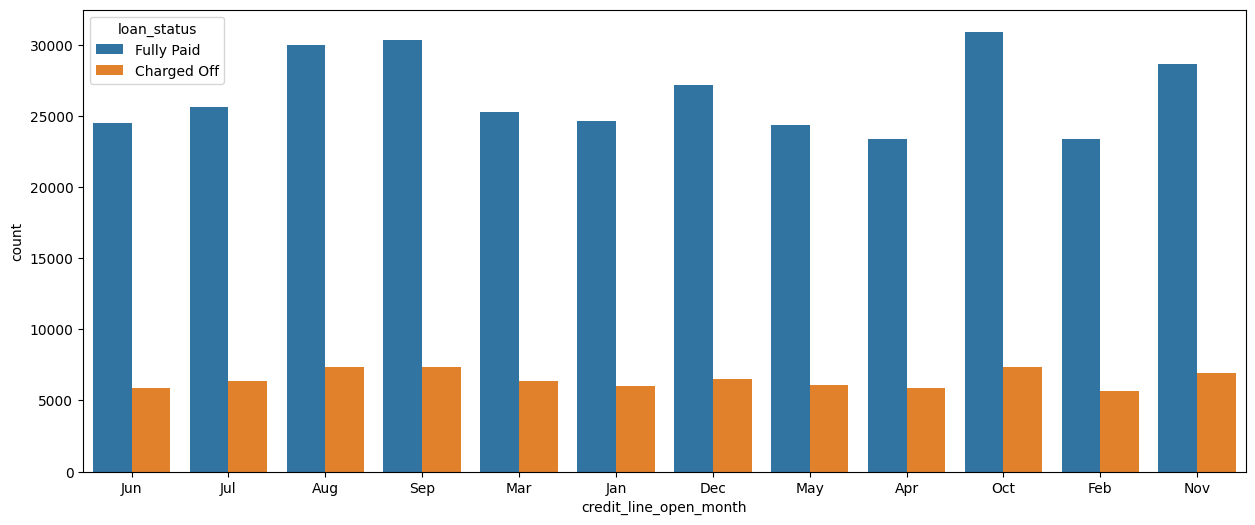

In [197]:
#Here i have ploted the number of credit accounts opened and number of default loan account by month
plt.figure(figsize=(15,6))
sns.countplot(x=data.credit_line_open_month,hue=data.loan_status)

### Report
- Every month has almost equal numbers of credit account opened by the borrowers.
- The loan default distribution is over the month follows Gaussian like Distribution.

In [198]:
#This feature is more related to investors how the loan was pitched to investors for funding
data.initial_list_status.unique()

array(['w', 'f'], dtype=object)

<Axes: xlabel='initial_list_status', ylabel='count'>

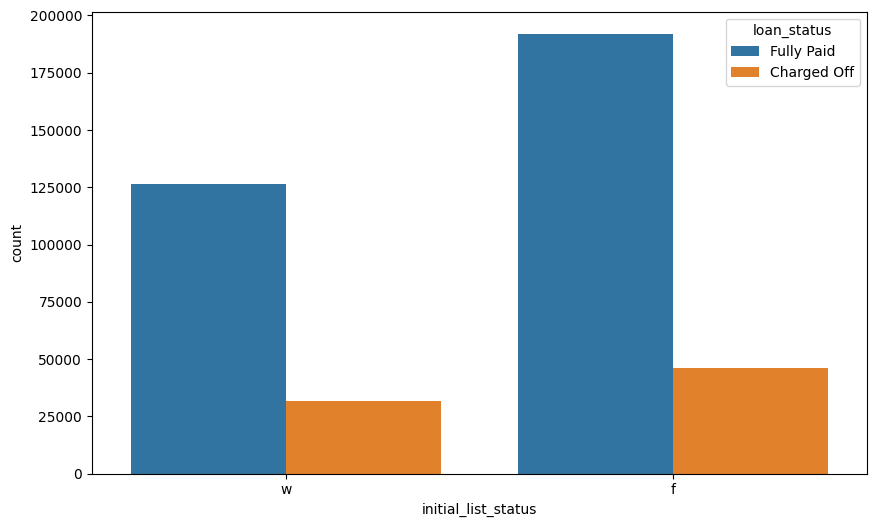

In [199]:
#Here i have ploted the type and number of loans pitched to investors and number of default loan associated with it.
plt.figure(figsize=(10,6))
sns.countplot(x=data.initial_list_status,hue=data.loan_status)

In [200]:
#Here i replace direct_apy with individual as it is falls under catregory of individual loan application.
data.application_type.replace("DIRECT_PAY","INDIVIDUAL",inplace=True)
data.application_type.unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

<Axes: xlabel='application_type', ylabel='count'>

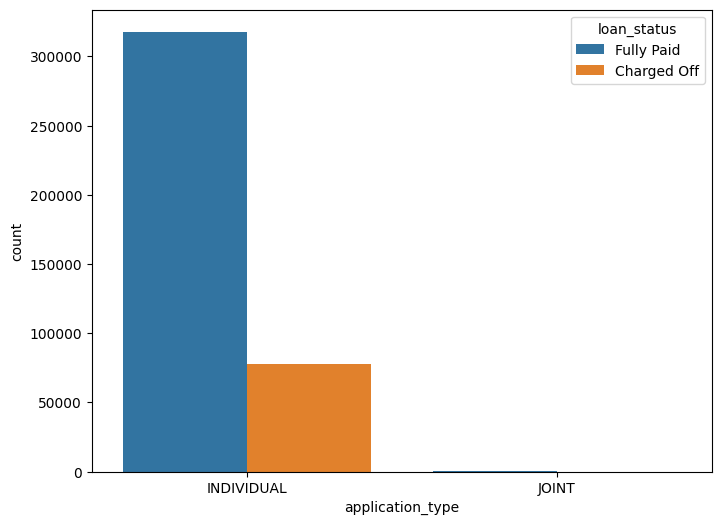

In [201]:
#Here i have ploted the type and number of applications and number of default loan associated with it.
plt.figure(figsize=(8,6))
sns.countplot(x=data.application_type,hue=data.loan_status)

In [202]:
pd.crosstab(data.loan_status,data.application_type,margins=True)

application_type,INDIVIDUAL,JOINT,All
loan_status,,,
Charged Off,77619,54,77673
Fully Paid,317986,371,318357
All,395605,425,396030


### Report
- Majority of the borrowers have aaplied for loan as as individual applicant **99.9%**.
- THerefore the number of default loans would aslo be highest for thr individual loan application **99.93%**.

In [203]:
#Here i have extracted the pincode form the borrowers address as the pincode is present at the last token/word of the address as specified in the dataset.
data["address_pincode"]=data.address.str.split(" ").str[-1]

In [204]:
data.address_pincode.unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

<Axes: xlabel='address_pincode', ylabel='count'>

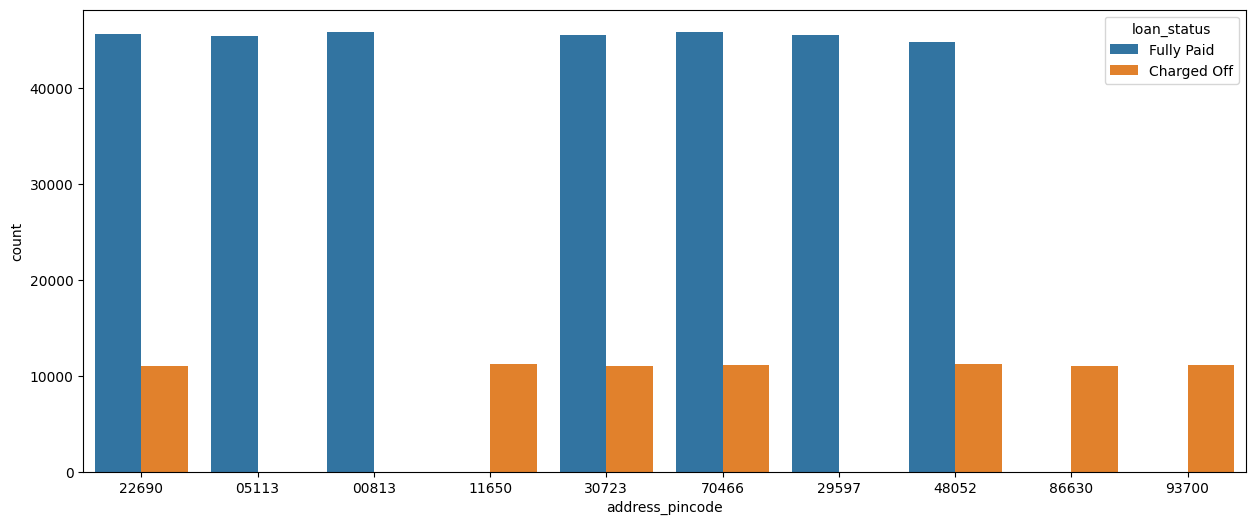

In [205]:
#Here i am plotting the number of borrowers area wise and the number of loan defaults area wise
plt.figure(figsize=(15,6))
sns.countplot(x=data.address_pincode,hue=data.loan_status)

### Report
- The borrowers coming from pincode area **(11650,86630,937000)** have **100%** loan defaults for that areas,it is the most risky place.
- LC should be highly *Careful* while giving loans in these areas.
- The borrowers coming from pincode area **(05113,00813,295970)** have **0%** loan defaults for that areas,it is the most safest place.
- LC should *Safely* give more loans in these areas.

In [206]:
data.shape

(396030, 33)

In [207]:
data.drop(columns=["address","issue_d","earliest_cr_line","loan_status_numerical"],inplace=True)

In [208]:
data.shape

(396030, 29)

In [209]:
categorical1=[features for features in data.columns if data[features].dtype=="O"]
numerical1=[features for features in data.columns if data[features].dtype!="O"]

In [210]:
data[numerical1].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [211]:
data[categorical1].isna().sum()

term                          0
grade                         0
sub_grade                     0
emp_title                 22927
emp_length                18301
home_ownership                0
verification_status           0
loan_status                   0
purpose                       0
loan_title                 1756
initial_list_status           0
application_type              0
issue_month                   0
issue_year                    0
credit_line_open_year         0
credit_line_open_month        0
address_pincode               0
dtype: int64

In [212]:
data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

#### Handling missing/nan values
- We will fill revol_util with mean
- We will fill mort_acc,pub_rec_bankrupties with median
- We will replace categorical1 missing features values with most_frequent

In [213]:
from sklearn.impute import SimpleImputer
impute1=SimpleImputer(strategy="mean")
impute2=SimpleImputer(strategy="median")
impute3=SimpleImputer(strategy="most_frequent")

In [214]:
x=data.drop("loan_status",axis=1)
x.shape

(396030, 28)

In [215]:
y=data[["loan_status"]]
y.shape

(396030, 1)

In [216]:
#Handling Nan values
x[["revol_util"]]=impute1.fit_transform(x[["revol_util"]])
x.loc[:,["mort_acc","pub_rec_bankruptcies"]]=impute2.fit_transform(x.loc[:,["mort_acc","pub_rec_bankruptcies"]])
x.loc[:,["emp_title","emp_length","loan_title"]]=impute3.fit_transform(x.loc[:,["emp_title","emp_length","loan_title"]])

In [217]:
#Confirming no nan values left
x.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
loan_title                0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
issue_month               0
issue_year                0
credit_line_open_year     0
credit_line_open_month    0
address_pincode           0
dtype: int64

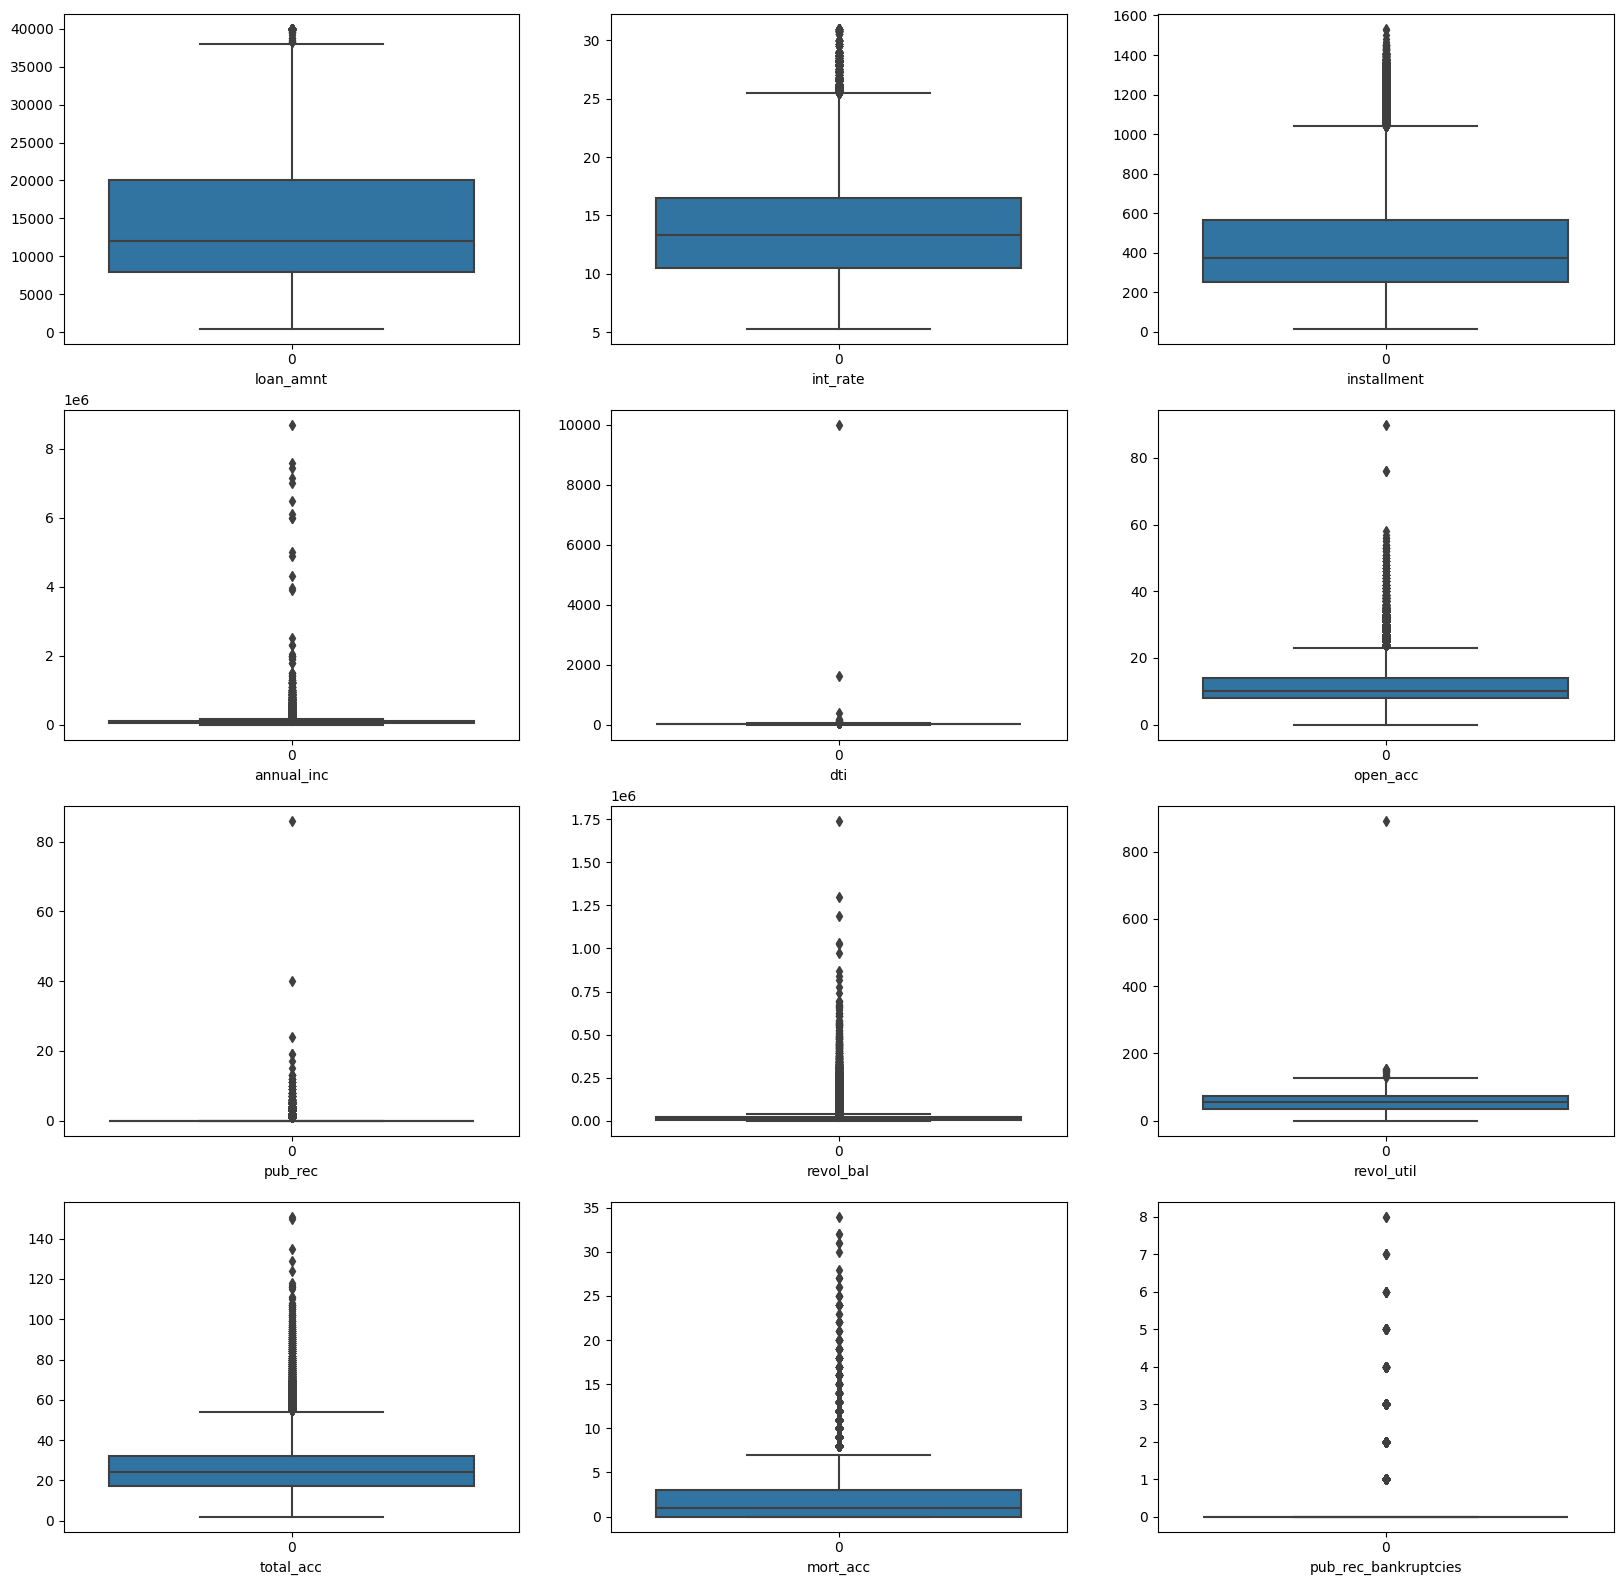

In [218]:
#Here i am plotting boxplot for numerical values
plt.figure(figsize=(20,30))
for i in range(len(numerical1)):
    plt.subplot(6,3,i+1)
    sns.boxplot(data[numerical1[i]])
    plt.xlabel(numerical1[i])

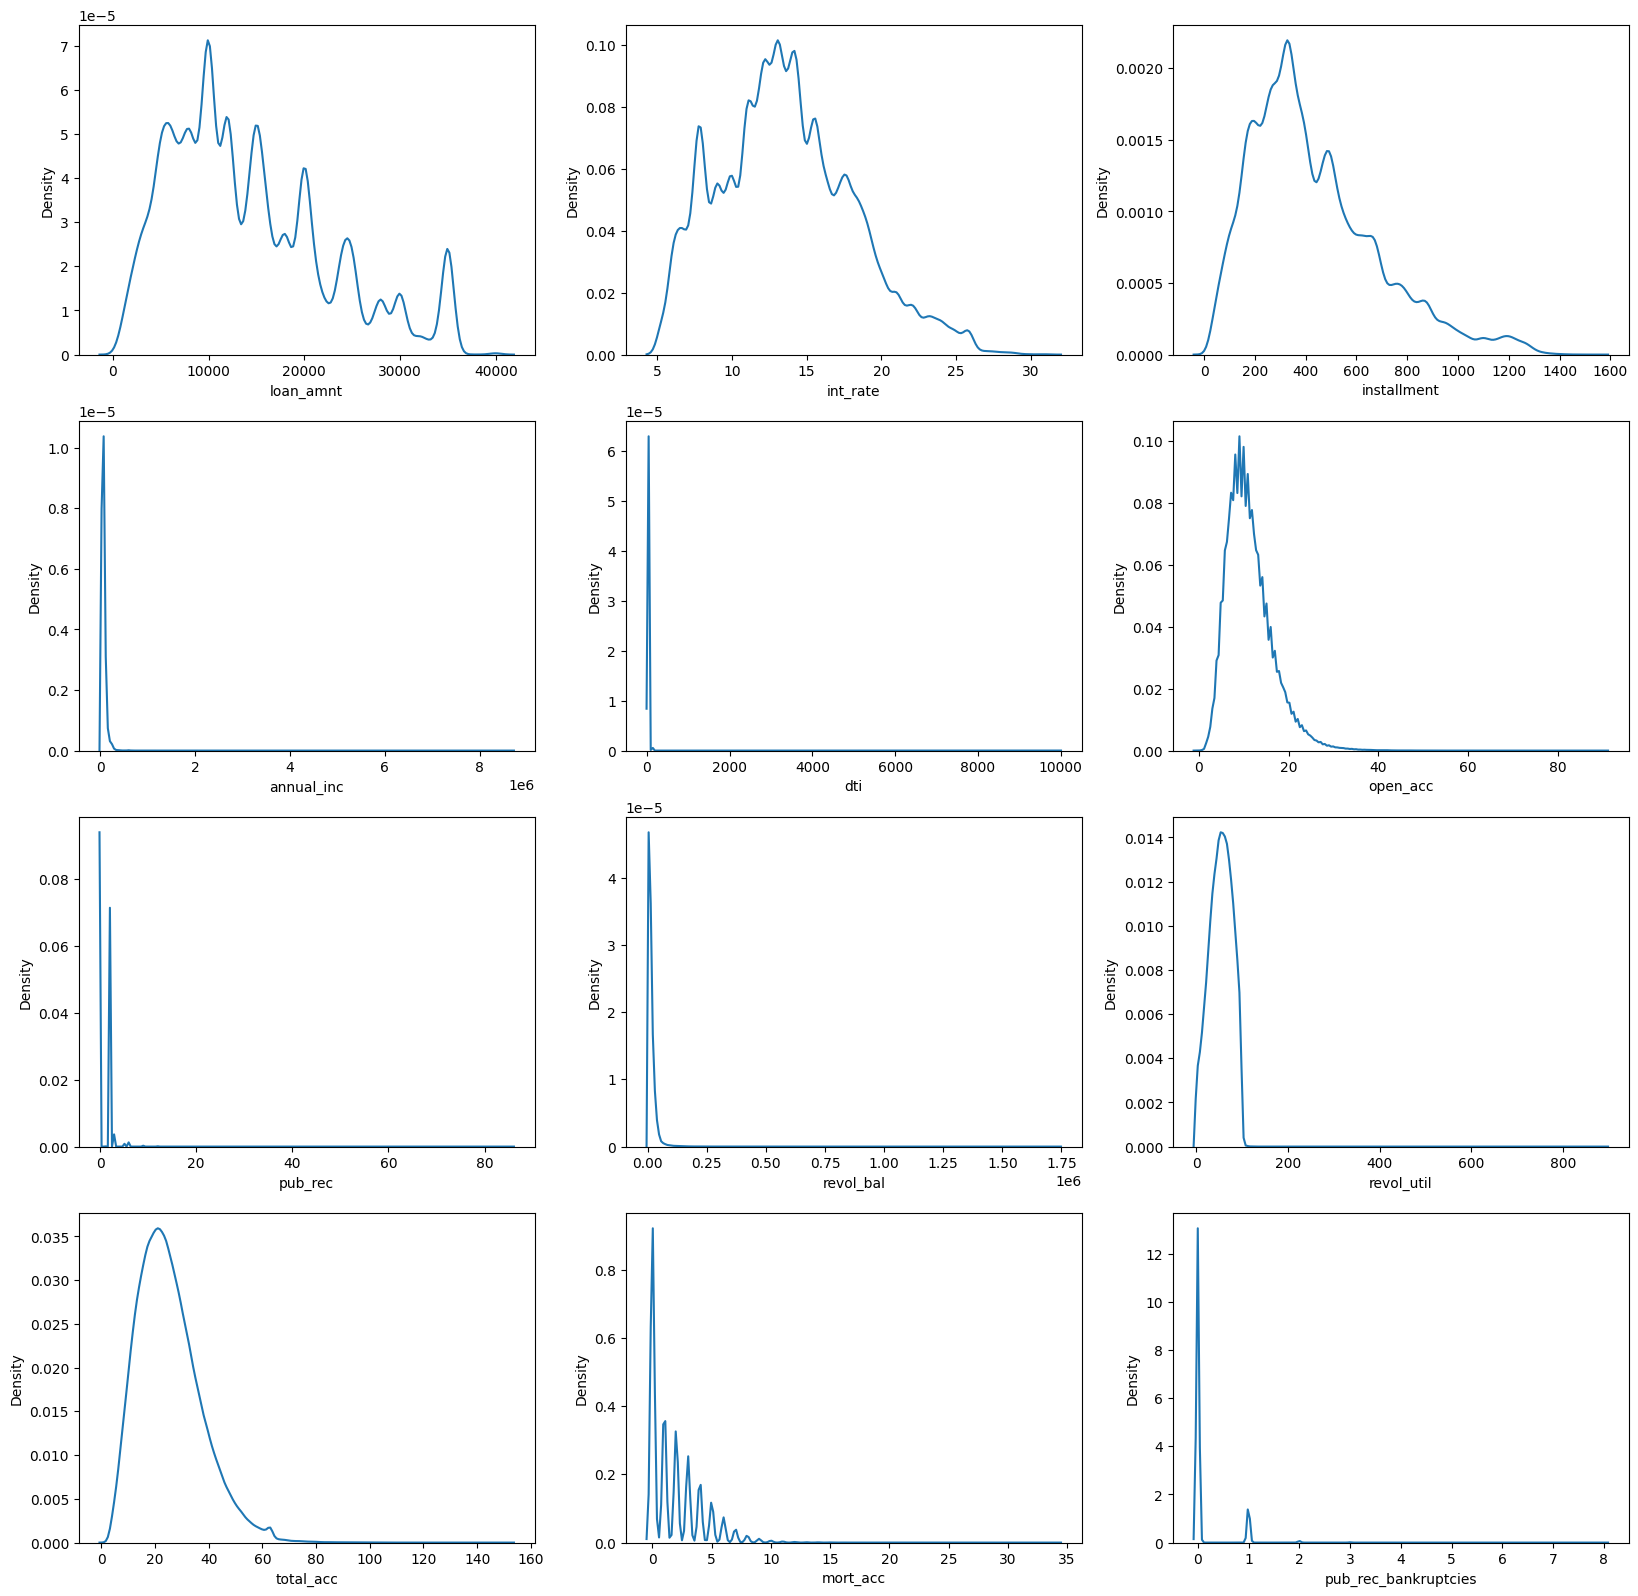

In [219]:
#Here i am plotting kdeplot for numerical values to check their distribution
plt.figure(figsize=(20,30))
for i in range(len(numerical1)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(data[numerical1[i]])
    plt.xlabel(numerical1[i])

In [220]:
data[numerical1].skew()

loan_amnt                 0.777285
int_rate                  0.420669
installment               0.983598
annual_inc               41.042725
dti                     431.051225
open_acc                  1.213019
pub_rec                  16.576564
revol_bal                11.727515
revol_util               -0.071778
total_acc                 0.864328
mort_acc                  1.600132
pub_rec_bankruptcies      3.423440
dtype: float64

In [221]:
#Here we deal with outliers by capping them as dropping them would lead to loass of large amount of data
def cap_outlier(data,col):
    q1=data[col].quantile(0.25)
    q2=data[col].quantile(0.5)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    data.loc[data[col]<lower_limit,col]=lower_limit
    data.loc[data[col]>upper_limit,col]=upper_limit
    return data

for i in numerical1:
    cap_outlier(data,i)
data[numerical1].skew()

loan_amnt               0.775420
int_rate                0.385226
installment             0.773029
annual_inc              0.894436
dti                     0.243415
open_acc                0.651546
pub_rec                 0.000000
revol_bal               0.990772
revol_util             -0.174673
total_acc               0.579608
mort_acc                1.077531
pub_rec_bankruptcies    0.000000
dtype: float64

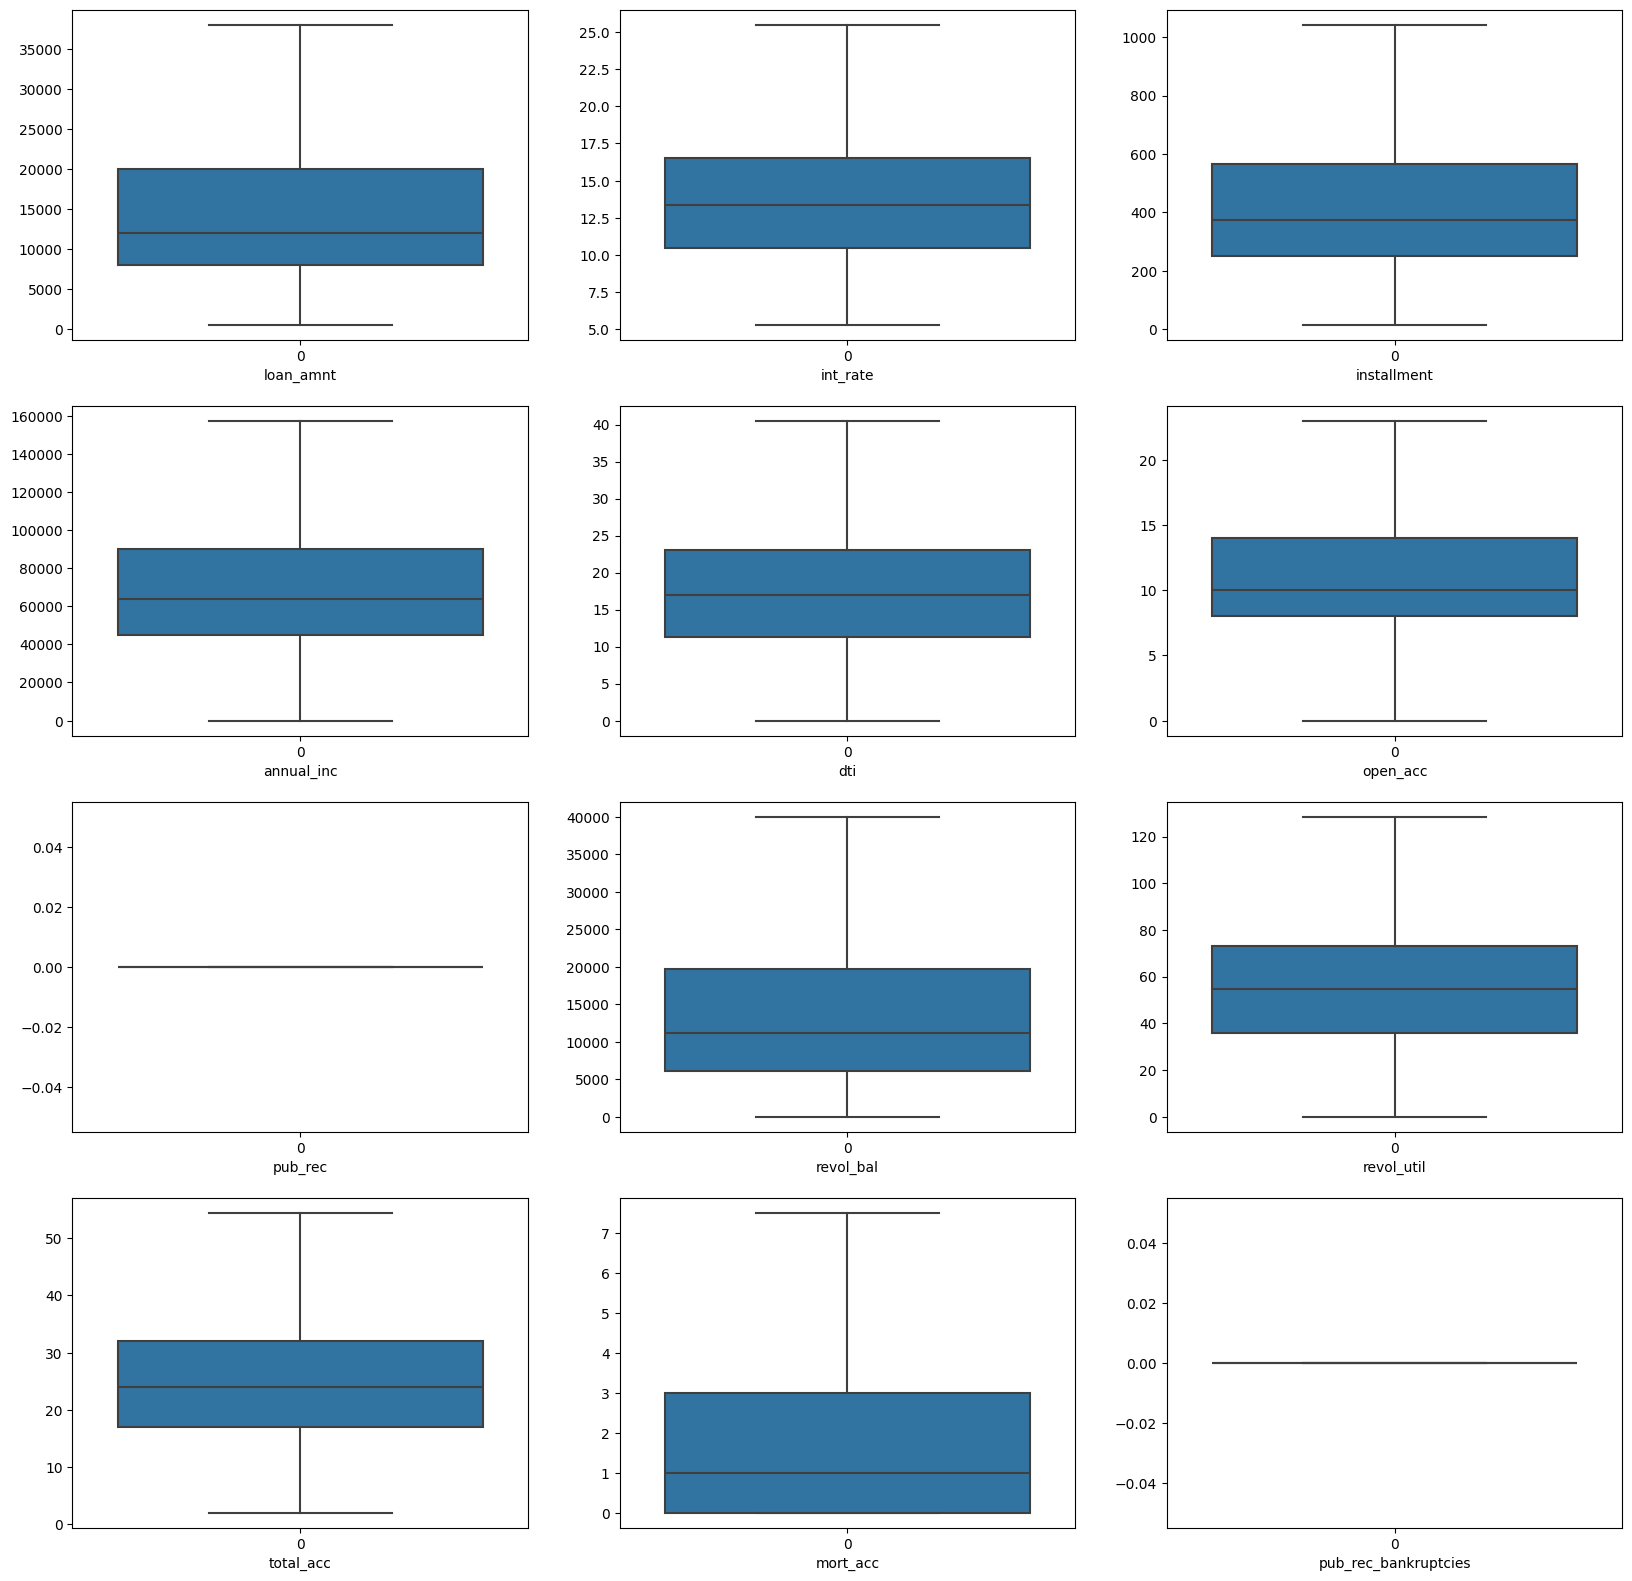

In [222]:
#Here we can see no outliers 
plt.figure(figsize=(20,30))
for i in range(len(numerical1)):
    plt.subplot(6,3,i+1)
    sns.boxplot(data[numerical1[i]])
    plt.xlabel(numerical1[i])

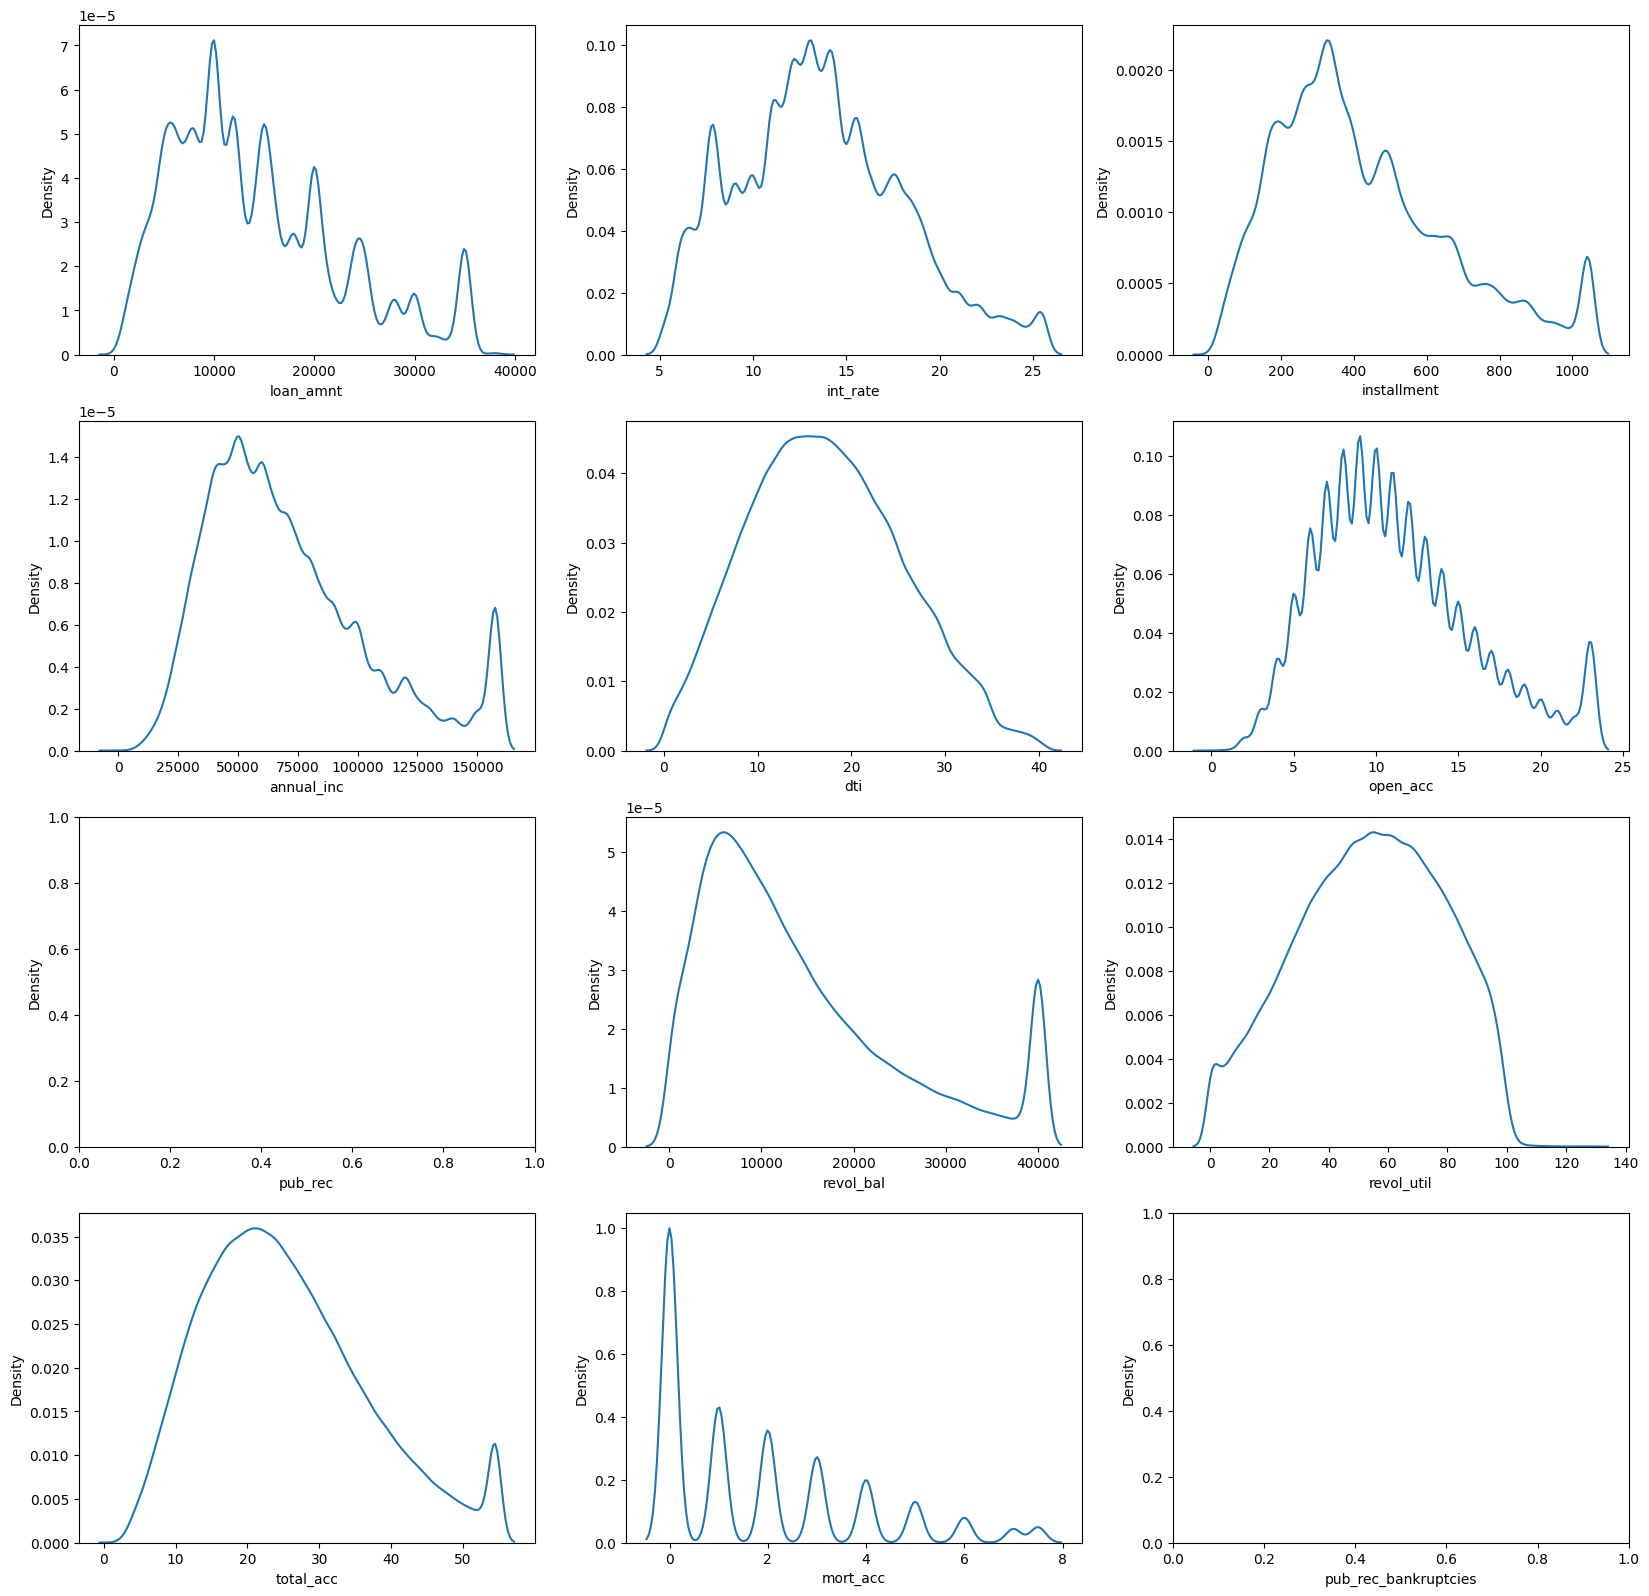

In [223]:
#Here i am plotting kdeplot for numerical values to check their distribution now it has become more gaussian like distribution which is good for our model
plt.figure(figsize=(20,30))
for i in range(len(numerical1)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(data[numerical1[i]])
    plt.xlabel(numerical1[i])

In [224]:
#here i amd using statistical chi2 test to check every categorical variable correlation with the target variable
from scipy.stats import chi2_contingency
category_correlation=pd.DataFrame(columns=["column","p","Hypothesis Accept/Reject"])
for i in range(len(categorical1)):
    contigency_table=pd.crosstab(data[categorical1[i]],data.loan_status)
    p=chi2_contingency(contigency_table)[1]
    alpha=0.05
    if p<alpha:
        category_correlation.loc[i]=[categorical1[i], p,"Reject null hypothesis both are correlated."]
    else:
        category_correlation.loc[i]=[categorical1[i],p, "Accept null hypothesis both are not correlated."]
        
category_correlation

,column,p,Hypothesis Accept/Reject
0,term,0.000000e+00,Reject null hypothesis both are correlated.
1,grade,0.000000e+00,Reject null hypothesis both are correlated.
2,sub_grade,0.000000e+00,Reject null hypothesis both are correlated.
3,emp_title,2.540377e-06,Reject null hypothesis both are correlated.
4,emp_length,1.884050e-21,Reject null hypothesis both are correlated.
5,home_ownership,0.000000e+00,Reject null hypothesis both are correlated.
6,verification_status,0.000000e+00,Reject null hypothesis both are correlated.
7,loan_status,0.000000e+00,Reject null hypothesis both are correlated.
8,purpose,6.573355e-291,Reject null hypothesis both are correlated.
9,loan_title,1.000000e+00,Accept null hypothesis both are not correlated.


In [225]:
#Dropping the categorical features with no correlation with target variable and a feature with multicollinearity
x=x.drop(["loan_title","credit_line_open_month","sub_grade"],axis=1)
x.shape

(396030, 25)

In [226]:
x.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,credit_line_open_year,address_pincode
0,10000.0,36 months,11.44,329.48,B,Marketing,10+ years,RENT,117000.0,Not Verified,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,Jan,2015,1990,22690
1,8000.0,36 months,11.99,265.68,B,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,Jan,2015,2004,05113
2,15600.0,36 months,10.49,506.97,B,Statistician,< 1 year,RENT,43057.0,Source Verified,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,Jan,2015,2007,05113
3,7200.0,36 months,6.49,220.65,A,Client Advocate,6 years,RENT,54000.0,Not Verified,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,Nov,2014,2006,00813
4,24375.0,60 months,17.27,609.33,C,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,Apr,2013,1999,11650


In [227]:
#Converting non categorical features into int
x.credit_line_open_year=x.credit_line_open_year.astype(np.int8)
x.issue_year=x.issue_year.astype(np.int16)
x.address_pincode=x.address_pincode.astype(np.int16)

In [228]:
#Splitting x features into cartegorcal and numerical
categoricalx=[features for features in x.columns if x[features].dtype=="O"]
numericalx=[features for features in x.columns if x[features].dtype!="O"]
numericalx

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'issue_year',
 'credit_line_open_year',
 'address_pincode']

In [229]:
from sklearn.compose import ColumnTransformer
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import PowerTransformer,OneHotEncoder

In [230]:
#Counting the number of nunique values to move initial index of one hot encoder to avoid multi-collinearity problem/dummy variable trap
for i in range(len(categoricalx)):
    print(f"{categoricalx[i]} : {x[categoricalx[i]].nunique()}")

term : 2
grade : 7
emp_title : 173105
emp_length : 11
home_ownership : 6
verification_status : 3
purpose : 14
initial_list_status : 2
application_type : 2
issue_month : 12


In [231]:
#Creating a list of variables according to their preproccesseing step
power_transformer=numericalx
one_hot_encoder=["term","grade","emp_length","home_ownership","verification_status","purpose","initial_list_status","application_type","issue_month"]
binary_encoder=["emp_title"]

In [232]:
ct=ColumnTransformer(
        [
            ("OneHotEncoder",OneHotEncoder(),one_hot_encoder),
            ("PowerTransformer",PowerTransformer(),power_transformer),
            ("BinaryEncoder",BinaryEncoder(),binary_encoder)
        ],
    remainder="passthrough",
)

In [233]:
x=ct.fit_transform(x)
x[0]

array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.33737032,
       -0.41864623, -0.24561366,  1.14569064,  1.03452681,  0.98792953,
       -0.41321198,  1.37284207, -0.47456267,  0.11565325, -1.18

In [234]:
#Finiding indexes to remove to avoid dummy variable trap
total=np.arange(x.shape[1])
remove_idx=[0,2,9,20,26,29,43,45,47,59]
final=[i for i in total if i not in remove_idx]
x.shape

(396030, 92)

In [235]:
#Removing indexs to avoid dummy variable trap
x=x[:,final]
x.shape

(396030, 82)

In [236]:
#Converting y into numerical for model training
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y[:5]

array([1, 1, 1, 1, 0])

In [237]:
#Splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((316824, 82), (316824,), (79206, 82), (79206,))

In [238]:
# Here since we used Binary encoder we will not use linear models as they misinterpret bit values to ordinal values.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [239]:
#Here i am using the metrics to evaluate my classification results
from sklearn.metrics import classification_report,confusion_matrix

In [240]:
#Here i have implemented DecisionTreeClassifer
dtc=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=15)
dtc.fit(x_train,y_train)
print(f"Training Accuracy : {dtc.score(x_train,y_train)}")
print(f"Testing Accuracy : {dtc.score(x_test,y_test)}")
y_pred=dtc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(f"Confuison matric : \n{cm}")
cr=classification_report(y_test,y_pred)
print(f"classification report : \n{cr}")

Training Accuracy : 0.9106065197081029
Testing Accuracy : 0.8765118804131
Confuison matric : 
[[ 7885  7650]
 [ 2131 61540]]
classification report : 
              precision    recall  f1-score   support

           0       0.79      0.51      0.62     15535
           1       0.89      0.97      0.93     63671

    accuracy                           0.88     79206
   macro avg       0.84      0.74      0.77     79206
weighted avg       0.87      0.88      0.87     79206



In [241]:
#Here i have implemented RandomForestClassifier
rlayer=RandomForestClassifier(criterion="entropy",random_state=42,max_depth=13,n_estimators=13)
rlayer.fit(x_train,y_train)
print(f"Training Accuracy : {rlayer.score(x_train,y_train)}")
print(f"Testing Accuracy : {rlayer.score(x_test,y_test)}")
y_pred=rlayer.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(f"Confuison matric : \n{cm}")
cr=classification_report(y_test,y_pred)
print(f"classification report : \n{cr}")

Training Accuracy : 0.8646567179254097
Testing Accuracy : 0.8576117970860794
Confuison matric : 
[[ 4606 10929]
 [  349 63322]]
classification report : 
              precision    recall  f1-score   support

           0       0.93      0.30      0.45     15535
           1       0.85      0.99      0.92     63671

    accuracy                           0.86     79206
   macro avg       0.89      0.65      0.68     79206
weighted avg       0.87      0.86      0.83     79206



In [242]:
xgbc=XGBClassifier()
xgbc.fit(x_train,y_train)
print(f"Training Accuracy : {xgbc.score(x_train,y_train)}")
print(f"Testing Accuracy : {xgbc.score(x_test,y_test)}")
y_pred=xgbc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(f"Confuison matric : \n{cm}")
cr=classification_report(y_test,y_pred)
print(f"classification report : \n{cr}")

Training Accuracy : 0.899123803752241
Testing Accuracy : 0.8884932959624271
Confuison matric : 
[[ 7670  7865]
 [  967 62704]]
classification report : 
              precision    recall  f1-score   support

           0       0.89      0.49      0.63     15535
           1       0.89      0.98      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.89      0.74      0.78     79206
weighted avg       0.89      0.89      0.88     79206



In [243]:
#Here i have implemented GaussianNiveBayes
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(f"Training Accuracy : {gnb.score(x_train,y_train)}")
print(f"Testing Accuracy : {gnb.score(x_test,y_test)}")
y_pred=gnb.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(f"Confuison matric : \n{cm}")
cr=classification_report(y_test,y_pred)
print(f"classification report : \n{cr}")

Training Accuracy : 0.7513730020452996
Testing Accuracy : 0.7521147387824155
Confuison matric : 
[[ 5878  9657]
 [ 9977 53694]]
classification report : 
              precision    recall  f1-score   support

           0       0.37      0.38      0.37     15535
           1       0.85      0.84      0.85     63671

    accuracy                           0.75     79206
   macro avg       0.61      0.61      0.61     79206
weighted avg       0.75      0.75      0.75     79206



### Report:
- Till now i have tried 4 classification algorithms DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,GaussianNB.
- XGBClassifier is giving the best results with training accuracy of 89.9% and testing accuracy of 88.8%.

In [244]:
# Here i have implemented SupportVectorClassifier(SVC)
# svc=SVC(kernel="rbf",C=1)
# svc.fit(x_train,y_train)
# print(f"Training Accuracy : {svc.score(x_train,y_train)}")
# print(f"Testing Accuracy : {svc.score(x_test,y_test)}")
# y_pred=svc.predict(x_test)

# cm=confusion_matrix(y_test,y_pred)
# print(f"Confuison matric : \n{cm}")
# cr=classification_report(y_test,y_pred)
# print(f"classification report : \n{cr}")

#### Models Hyperparameter Tuning

In [245]:
models={
    "DecisionTreeClassifier":dtc,
    "RandomForestClassifier":rlayer,
    "naives_bayes":gnb,
    "XGBClassifier":xgbc,
}

params={
    "DecisionTreeClassifier":{
        "criterion":["gini","entropy"],
        "max_depth":[13,15,17,20],    
    },
    "RandomForestClassifier":{
        "criterion":["gini","entropy"],
        "max_depth":[13,15,17,20], 
        "n_estimators":[13,15,17,20],   
    },
    "naives_bayes":{},
    "XGBClassifier":{},
}

In [246]:
# from sklearn.model_selection import RandomizedSearchCV
# gscv_table=pd.DataFrame(columns=["model","best_score","best_params"])
# j=0
# for i in models:
#     gsc=RandomizedSearchCV(estimator=models[i],param_distributions=params[i],cv=5,return_train_score=True,verbose=3)
#     gsc.fit(x,y)
#     gscv_table.loc[i]=[i,gsc.best_score_,gsc.best_params_]
#     j=j+1
    
# gscv_table

### Report
- We have applied RandomizedSearchCV for finding best model and its best parameters.
- We got that the XGBClassifier model performs the best.
- Tarining Accuracy = **89.9%** and Testing Accuracy = **88.9%**.

In [332]:
import joblib
joblib.dump(xgbc,"xgbc_model.pkl")

['xgbc_model.pkl']

In [333]:
xgbcmodel=joblib.load("xgbc_model.pkl")
xgbcmodel

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Deep Learning

In [248]:
# Here i am implementing Deep learnirng ANN feed forward architecture to train the same data.
import torch 
from torch import optim,nn
from torch.utils.data import Dataset,DataLoader
import torchinfo
from torchinfo import summary
from tqdm import tqdm

In [249]:
df=pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#### Splitting data to x and y and training and testing set

In [250]:
df_x=df.drop("loan_status",axis=1)
df_x.shape

(396030, 26)

In [251]:
df_y=df[["loan_status"]]
df_y.shape

(396030, 1)

In [252]:
dfx_train,dfx_test,dfy_train,dfy_test=train_test_split(df_x,df_y,random_state=42,test_size=0.2,stratify=df_y)
dfx_train.shape,dfy_train.shape,dfx_test.shape,dfy_test.shape

((316824, 26), (316824, 1), (79206, 26), (79206, 1))

#### Here I have created the Data and Dataloader which will provide me with data in batches for training and testing and all the pre processing happend in Data class.

In [253]:
class Data(Dataset):
    def __init__(self,x,y):
        super().__init__()
        x.rename(columns={"title":"loan_title"},inplace=True)
        x["credit_line_open_month"]=x.earliest_cr_line.str.split("-").str[0]
        x["credit_line_open_year"]=x.earliest_cr_line.str.split("-").str[1]
        month=[]
        year=[]
        for i in range(x.shape[0]):
            month.append(x.issue_d.iloc[i].split("-")[0])
            year.append(x.issue_d.iloc[i].split("-")[1])
        x["issue_month"]=month
        x["issue_year"]=year
        x.application_type.replace("DIRECT_PAY","INDIVIDUAL",inplace=True)
        x["address_pincode"]=x.address.str.split(" ").str[-1]
        x=x.drop(['issue_d', 'earliest_cr_line', 'address'],axis=1)
        
        x[["revol_util"]]=impute1.transform(x[["revol_util"]])
        x.loc[:,["mort_acc","pub_rec_bankruptcies"]]=impute2.transform(x.loc[:,["mort_acc","pub_rec_bankruptcies"]])
        x.loc[:,["emp_title","emp_length","loan_title"]]=impute3.transform(x.loc[:,["emp_title","emp_length","loan_title"]])
        numerical=[features for features in x.columns if x[features].dtype!="O"]
        for i in numerical:
            cap_outlier(x,i)
        x=x.drop(["loan_title","credit_line_open_month","sub_grade"],axis=1)
        x.credit_line_open_year=x.credit_line_open_year.astype(np.int8)
        x.issue_year=x.issue_year.astype(np.int16)
        x.address_pincode=x.address_pincode.astype(np.int16)
        numericalx=[features for features in x.columns if x[features].dtype!="O"]
        categoricalx=[features for features in x.columns if x[features].dtype=="O"]
        x=ct.transform(x)
        print(x[0])
        total=np.arange(x.shape[1])
        remove_idx=[0,2,9,20,26,29,43,45,47,59]
        final=[i for i in total if i not in remove_idx]
        x=x[:,final]
        y=le.fit_transform(y)
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.float32)
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.x.shape[0]
           

In [254]:
train_data=Data(dfx_train,dfy_train)
test_data=Data(dfx_test,dfy_test)
len(test_data)

[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.61638867e-01
 -6.16164297e-01 -1.95227

79206

In [255]:
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=32,
    drop_last=False,
    shuffle=True,
)

test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=32,
    drop_last=True,
    shuffle=True,
)

In [256]:
for batch,(x,y) in  enumerate(train_dataloader):
    print(batch,x.shape,y.shape)

0 torch.Size([32, 82]) torch.Size([32])
1 torch.Size([32, 82]) torch.Size([32])
2 torch.Size([32, 82]) torch.Size([32])
3 torch.Size([32, 82]) torch.Size([32])
4 torch.Size([32, 82]) torch.Size([32])
5 torch.Size([32, 82]) torch.Size([32])
6 torch.Size([32, 82]) torch.Size([32])
7 torch.Size([32, 82]) torch.Size([32])
8 torch.Size([32, 82]) torch.Size([32])
9 torch.Size([32, 82]) torch.Size([32])
10 torch.Size([32, 82]) torch.Size([32])
11 torch.Size([32, 82]) torch.Size([32])
12 torch.Size([32, 82]) torch.Size([32])
13 torch.Size([32, 82]) torch.Size([32])
14 torch.Size([32, 82]) torch.Size([32])
15 torch.Size([32, 82]) torch.Size([32])
16 torch.Size([32, 82]) torch.Size([32])
17 torch.Size([32, 82]) torch.Size([32])
18 torch.Size([32, 82]) torch.Size([32])
19 torch.Size([32, 82]) torch.Size([32])
20 torch.Size([32, 82]) torch.Size([32])
21 torch.Size([32, 82]) torch.Size([32])
22 torch.Size([32, 82]) torch.Size([32])
23 torch.Size([32, 82]) torch.Size([32])
24 torch.Size([32, 82]) to

In [257]:
for batch,(x,y) in  enumerate(test_dataloader):
    print(batch,x.shape,y.shape)

0 torch.Size([32, 82]) torch.Size([32])
1 torch.Size([32, 82]) torch.Size([32])
2 torch.Size([32, 82]) torch.Size([32])
3 torch.Size([32, 82]) torch.Size([32])
4 torch.Size([32, 82]) torch.Size([32])
5 torch.Size([32, 82]) torch.Size([32])
6 torch.Size([32, 82]) torch.Size([32])
7 torch.Size([32, 82]) torch.Size([32])
8 torch.Size([32, 82]) torch.Size([32])
9 torch.Size([32, 82]) torch.Size([32])
10 torch.Size([32, 82]) torch.Size([32])
11 torch.Size([32, 82]) torch.Size([32])
12 torch.Size([32, 82]) torch.Size([32])
13 torch.Size([32, 82]) torch.Size([32])
14 torch.Size([32, 82]) torch.Size([32])
15 torch.Size([32, 82]) torch.Size([32])
16 torch.Size([32, 82]) torch.Size([32])
17 torch.Size([32, 82]) torch.Size([32])
18 torch.Size([32, 82]) torch.Size([32])
19 torch.Size([32, 82]) torch.Size([32])
20 torch.Size([32, 82]) torch.Size([32])
21 torch.Size([32, 82]) torch.Size([32])
22 torch.Size([32, 82]) torch.Size([32])
23 torch.Size([32, 82]) torch.Size([32])
24 torch.Size([32, 82]) to

#### Here i have build the ANN architecture from scratch using pytorch

In [258]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(
            in_features=82,
            out_features=128,
        )
        self.layer2=nn.Linear(
            in_features=128,
            out_features=256,
        )
        self.layer3=nn.Linear(
            in_features=256,
            out_features=128,
        )
        self.layer4=nn.Linear(
            in_features=128,
            out_features=64,
        )
        self.layer5=nn.Linear(
            in_features=64,
            out_features=32,
        )
        self.layer6=nn.Linear(
            in_features=32,
            out_features=1,
        )
        
    def forward(self,x):
        x=nn.functional.relu(self.layer1(x))
        x=nn.functional.relu(self.layer2(x))
        x=nn.functional.relu(self.layer3(x))
        x=nn.functional.relu(self.layer4(x))
        x=nn.functional.relu(self.layer5(x))
        x=nn.functional.sigmoid(self.layer6(x))
        return x
        

In [259]:
model=ANN()
model

ANN(
  (layer1): Linear(in_features=82, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=32, bias=True)
  (layer6): Linear(in_features=32, out_features=1, bias=True)
)

In [260]:
for parameters in model.parameters():
    print(parameters)

Parameter containing:
tensor([[-0.0268, -0.1054,  0.1070,  ..., -0.0438,  0.0184, -0.0869],
        [-0.0170,  0.0299,  0.0916,  ...,  0.0722, -0.0650,  0.0376],
        [ 0.0613,  0.0810, -0.0100,  ...,  0.0675,  0.0378, -0.0839],
        ...,
        [ 0.1048, -0.0680, -0.0836,  ..., -0.0932, -0.0258, -0.0725],
        [-0.0198,  0.0085,  0.0116,  ...,  0.0459,  0.0729, -0.0370],
        [-0.0316,  0.0697,  0.0758,  ...,  0.0515,  0.0541, -0.0904]],
       requires_grad=True)
Parameter containing:
tensor([-0.0015,  0.0893, -0.0529, -0.0802,  0.0546,  0.0212,  0.0462, -0.0053,
        -0.0395,  0.0930,  0.0914,  0.0420,  0.0519,  0.0515, -0.0522,  0.0746,
        -0.0324, -0.0484,  0.0866,  0.0978,  0.0569,  0.0711,  0.0513,  0.0202,
        -0.0563, -0.0834, -0.0587, -0.1038,  0.0496, -0.0609, -0.0339, -0.0714,
         0.0915,  0.0576,  0.0786, -0.0324, -0.0193,  0.0337, -0.0177, -0.0321,
        -0.0132,  0.0173,  0.0271, -0.0922, -0.0735,  0.0308,  0.0791, -0.0962,
         0.0276

#### Here i have printed the summary of the model which gives information about the parameters both(trainable and non trainanble)

In [261]:
test=torch.rand(32,82)
summary(model,input_size=(32,82))

Layer (type:depth-idx)                   Output Shape              Param #
ANN                                      [32, 1]                   --
├─Linear: 1-1                            [32, 128]                 10,624
├─Linear: 1-2                            [32, 256]                 33,024
├─Linear: 1-3                            [32, 128]                 32,896
├─Linear: 1-4                            [32, 64]                  8,256
├─Linear: 1-5                            [32, 32]                  2,080
├─Linear: 1-6                            [32, 1]                   33
Total params: 86,913
Trainable params: 86,913
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.78
Input size (MB): 0.01
Forward/backward pass size (MB): 0.16
Params size (MB): 0.35
Estimated Total Size (MB): 0.51

In [262]:
#Here i have defined the loss function and the optmizer to be used.
loss_fn=nn.BCELoss()
optimizer=optim.SGD(model.parameters(),lr=0.1)

#### Here I have defined the training and testing methods to print the accuracy.

In [263]:
from statistics import mean
device=torch.device("cpu")
epochs=15
model.to(device)
avg_loss=[]
for i in range(epochs):
    loss_val=[]
    total,correct=0,0
    for batch,(x,y) in tqdm(enumerate(train_dataloader),total=len(train_dataloader)):
        x=x.float().to(device)
        y=y.float().to(device)
        optimizer.zero_grad()
        pred=model(x)
        loss=loss_fn(pred,y.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        
        loss_val.append(loss.item())
        # pred=pred.detach().cpu()
        predict=np.where(pred>0.5,1,0)
        predict=predict.squeeze(-1)
        correct+=(predict==y).sum()
        total+=x.shape[0]
    avg_loss.append(mean(loss_val))
    print(f"Epoch {i+1} | Loss : {np.mean(loss_val)} | Accuracy: {100 * correct / total}%")

100%|██████████| 9901/9901 [00:18<00:00, 523.93it/s]


Epoch 1 | Loss : 0.429901557646518 | Accuracy: 81.63365173339844%


100%|██████████| 9901/9901 [00:26<00:00, 379.72it/s]


Epoch 2 | Loss : 0.35846526810252033 | Accuracy: 85.1043472290039%


100%|██████████| 9901/9901 [00:23<00:00, 425.37it/s]


Epoch 3 | Loss : 0.32195813841451815 | Accuracy: 87.2667465209961%


100%|██████████| 9901/9901 [00:24<00:00, 396.11it/s]


Epoch 4 | Loss : 0.3117381982086175 | Accuracy: 87.65339660644531%


100%|██████████| 9901/9901 [00:17<00:00, 574.12it/s]


Epoch 5 | Loss : 0.31370846247726614 | Accuracy: 87.46117401123047%


100%|██████████| 9901/9901 [00:26<00:00, 380.23it/s]


Epoch 6 | Loss : 0.3130005005035584 | Accuracy: 87.43466186523438%


100%|██████████| 9901/9901 [00:22<00:00, 431.48it/s]


Epoch 7 | Loss : 0.3127372552455525 | Accuracy: 87.44445037841797%


100%|██████████| 9901/9901 [00:17<00:00, 564.17it/s]


Epoch 8 | Loss : 0.30861357060099187 | Accuracy: 87.73735809326172%


100%|██████████| 9901/9901 [00:17<00:00, 564.49it/s]


Epoch 9 | Loss : 0.3008489284610588 | Accuracy: 88.0188980102539%


100%|██████████| 9901/9901 [00:17<00:00, 561.33it/s]


Epoch 10 | Loss : 0.30327742576332734 | Accuracy: 87.88412475585938%


100%|██████████| 9901/9901 [00:16<00:00, 585.05it/s]


Epoch 11 | Loss : 0.2994537310453361 | Accuracy: 87.97029113769531%


100%|██████████| 9901/9901 [00:17<00:00, 566.17it/s]


Epoch 12 | Loss : 0.29823387874488444 | Accuracy: 87.98165893554688%


100%|██████████| 9901/9901 [00:16<00:00, 590.15it/s]


Epoch 13 | Loss : 0.2951883088337172 | Accuracy: 88.01795196533203%


100%|██████████| 9901/9901 [00:16<00:00, 598.40it/s]


Epoch 14 | Loss : 0.295108789505275 | Accuracy: 88.17387390136719%


100%|██████████| 9901/9901 [00:18<00:00, 548.75it/s]

Epoch 15 | Loss : 0.2942280734495742 | Accuracy: 88.44500732421875%


In [264]:
avg_testloss=[]
with torch.inference_mode():
    total,correct=0,0
    loss_val=[]
    for x,y in test_dataloader:
        x=x.to(device)
        y=y.to(device)
        pred=model(x)
        loss=loss_fn(pred,y.unsqueeze(-1))
        loss_val.append(loss.item())
        pred=pred.detach().cpu()
        predict=np.where(pred>0.5,1,0)
        predict=predict.squeeze(-1)
        total+=x.shape[0]
        correct+=((predict==y).sum())  
    avg_testloss.append(np.mean(loss_val))
print( f"Accuracy of the network on the {total} test instances: {100 * correct / total}%") 
           
        

Accuracy of the network on the 79200 test instances: 88.74874114990234%


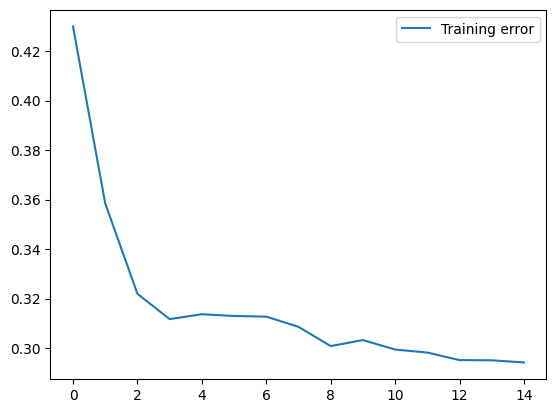

In [265]:
#This is the plot of training error vs epochs
plt.plot(range(0,15,1),avg_loss,label="Training error")
plt.legend()

### Report
- Here i have implemented a feed forward ANN architecture using pytorch to train the same data.
- The model architecture consists of 6 layers with ReLU activation function for hidden layers and Sigmoid activation function for output layer.
- The model was trained for 15 epochs.
- The model was optimized using the Stochastic Gradient Descent (SGD) optimizer.
- The model gave a training accuracy of 86.3% and testing accuracy of 88.78% which is comparable to the other models implemented.

### Testing proccess for a user's input:

In [266]:
def pre_process(x,impute1,impute2,impute3,ct):
    x.rename(columns={"title":"loan_title"},inplace=True)
    x["credit_line_open_month"]=x.earliest_cr_line.str.split("-").str[0]
    x["credit_line_open_year"]=x.earliest_cr_line.str.split("-").str[1]
    month=[]
    year=[]
    for i in range(x.shape[0]):
        month.append(x.issue_d.iloc[i].split("-")[0])
        year.append(x.issue_d.iloc[i].split("-")[1])
    x["issue_month"]=month
    x["issue_year"]=year
    x.application_type.replace("DIRECT_PAY","INDIVIDUAL",inplace=True)
    x["address_pincode"]=x.address.str.split(" ").str[-1]
    x=x.drop(['issue_d', 'earliest_cr_line', 'address'],axis=1)
    
    x[["revol_util"]]=impute1.transform(x[["revol_util"]])
    x.loc[:,["mort_acc","pub_rec_bankruptcies"]]=impute2.transform(x.loc[:,["mort_acc","pub_rec_bankruptcies"]])
    x.loc[:,["emp_title","emp_length","loan_title"]]=impute3.transform(x.loc[:,["emp_title","emp_length","loan_title"]])
    numerical=[features for features in x.columns if x[features].dtype!="O"]
    for i in numerical:
        cap_outlier(x,i)
    x=x.drop(["loan_title","credit_line_open_month","sub_grade"],axis=1)
    x.credit_line_open_year=x.credit_line_open_year.astype(np.int8)
    x.issue_year=x.issue_year.astype(np.int16)
    x.address_pincode=x.address_pincode.astype(np.int16)
    numericalx=[features for features in x.columns if x[features].dtype!="O"]
    categoricalx=[features for features in x.columns if x[features].dtype=="O"]
    x=ct.transform(x)
    total=np.arange(x.shape[1])
    remove_idx=[0,2,9,20,26,29,43,45,47,59]
    final=[i for i in total if i not in remove_idx]
    x=x[:,final]
    x=torch.tensor(x,dtype=torch.float32)
    return x

In [267]:
def predict_output(model,user_inp,impute1,impute2,impute3,ct):
    user_df=pd.DataFrame([user_inp])
    user_tensor=pre_process(user_df,impute1,impute2,impute3,ct)
    model.eval()
    with torch.no_grad():
        predict=model(user_tensor)
        pred=np.where(predict.squeeze(-1)>0.5,1,0).item()
        output=pred

    if output==0:
        return {
            "prediction": 0,
            "message": "⚠️ The applicant is likely to DEFAULT on the loan."
        }
    else:
        return {
            "prediction": 1,
            "message": "✅ The applicant is NOT likely to default on the loan."
        }

    

In [268]:
db=df.head(1)
db

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"


In [269]:
y=le.transform(db.loan_status)
y

array([1])

In [270]:
dbx=db.drop(["loan_status"],axis=1)
dbx

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"


In [271]:
d={}
dbx.columns,dbx.values[0]

(Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
        'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
        'verification_status', 'issue_d', 'purpose', 'title', 'dti',
        'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
        'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
        'pub_rec_bankruptcies', 'address'],
       dtype='object'),
 array([10000.0, ' 36 months', 11.44, 329.48, 'B', 'B4', 'Marketing',
        '10+ years', 'RENT', 117000.0, 'Not Verified', 'Jan-2015',
        'vacation', 'Vacation', 26.24, 'Jun-1990', 16.0, 0.0, 36369.0,
        41.8, 25.0, 'w', 'INDIVIDUAL', 0.0, 0.0,
        '0174 Michelle Gateway\r\nMendozaberg, OK 22690'], dtype=object))

In [272]:
#Here i am creating a dictionary of user's input
for i in range(dbx.shape[1]):
        d[dbx.columns[i]]=dbx.values[0][i]
d

{'loan_amnt': 10000.0,
 'term': ' 36 months',
 'int_rate': 11.44,
 'installment': 329.48,
 'grade': 'B',
 'sub_grade': 'B4',
 'emp_title': 'Marketing',
 'emp_length': '10+ years',
 'home_ownership': 'RENT',
 'annual_inc': 117000.0,
 'verification_status': 'Not Verified',
 'issue_d': 'Jan-2015',
 'purpose': 'vacation',
 'title': 'Vacation',
 'dti': 26.24,
 'earliest_cr_line': 'Jun-1990',
 'open_acc': 16.0,
 'pub_rec': 0.0,
 'revol_bal': 36369.0,
 'revol_util': 41.8,
 'total_acc': 25.0,
 'initial_list_status': 'w',
 'application_type': 'INDIVIDUAL',
 'mort_acc': 0.0,
 'pub_rec_bankruptcies': 0.0,
 'address': '0174 Michelle Gateway\r\nMendozaberg, OK 22690'}

In [273]:
predict_output(model,d,impute1,impute2,impute3,ct)

{'prediction': 1,
 'message': '✅ The applicant is NOT likely to default on the loan.'}

In [274]:
class Load_pipeline():
    def __init__(self,model,impute1,impute2,impute3,ct):
        self.model=model
        self.impute1=impute1
        self.impute2=impute2
        self.impute3=impute3
        self.ct=ct
        
    def predict(self,user_tensor):
        return(predict_output(self.model,user_tensor,self.impute1,self.impute2,self.impute3,self.ct))
        

### Report
- Pickle files python objects/serials of ML models into bytes.
- When we unpickle them it reconstructs the environment into memory.
- But if there is a change in the pytorch version or the python version it wont be able to unpickle it amy serialize objects in a new different versions.
- Joblib is just more fast and memory efficient to pickle files but still unsafe as working on different device could serialze the objevcts in diffrent manner.
- To solve this problem we save the model using .state_dict(model,"model.pth") because if we use pytorch.save(), it can also result in problem when pytorch version changes.
- In summary model.state_dict(model,"model.pth") is the best.

In [283]:
pipeline=Load_pipeline(model,impute1,impute2,impute3,ct)
pipeline.predict(d)

{'prediction': 1,
 'message': '✅ The applicant is NOT likely to default on the loan.'}

In [284]:
joblib.dump(pipeline,"ANN_loan_deafult_predition.pkl")

['ANN_loan_deafult_predition.pkl']

In [350]:
ANN_model=joblib.load("ANN_loan_deafult_predition.pkl")
ANN_model.predict(d)

{'prediction': 1,
 'message': '✅ The applicant is NOT likely to default on the loan.'}

In [277]:
#Saving my model's parameters only (weights and biases) in the safest way for deployment
torch.save(model.state_dict(),"ANN_loan_deafult_predition.pth")

In [278]:
#Now loading the model we need to define an architecture which is same to the model whose weights were saved so it can load the saved parameters accordingly.
#Here we assigns the weight to the ANN's model architecture which i have made ANN()
model = ANN()
model.load_state_dict(torch.load("ANN_loan_deafult_predition.pth", map_location="cpu"))
model.eval()

ANN(
  (layer1): Linear(in_features=82, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=32, bias=True)
  (layer6): Linear(in_features=32, out_features=1, bias=True)
)

### Testing process of user's input for ML model

In [316]:
def pre_process_ml(x,impute1,impute2,impute3,ct):
    x=pd.DataFrame([x])
    x.rename(columns={"title":"loan_title"},inplace=True)
    x["credit_line_open_month"]=x.earliest_cr_line.str.split("-").str[0]
    x["credit_line_open_year"]=x.earliest_cr_line.str.split("-").str[1]
    month=[]
    year=[]
    for i in range(x.shape[0]):
        month.append(x.issue_d.iloc[i].split("-")[0])
        year.append(x.issue_d.iloc[i].split("-")[1])
    x["issue_month"]=month
    x["issue_year"]=year
    x.application_type.replace("DIRECT_PAY","INDIVIDUAL",inplace=True)
    x["address_pincode"]=x.address.str.split(" ").str[-1]
    x=x.drop(['issue_d', 'earliest_cr_line', 'address'],axis=1)
    
    x[["revol_util"]]=impute1.transform(x[["revol_util"]])
    x.loc[:,["mort_acc","pub_rec_bankruptcies"]]=impute2.transform(x.loc[:,["mort_acc","pub_rec_bankruptcies"]])
    x.loc[:,["emp_title","emp_length","loan_title"]]=impute3.transform(x.loc[:,["emp_title","emp_length","loan_title"]])
    numerical=[features for features in x.columns if x[features].dtype!="O"]
    for i in numerical:
        cap_outlier(x,i)
    x=x.drop(["loan_title","credit_line_open_month","sub_grade"],axis=1)
    x.credit_line_open_year=x.credit_line_open_year.astype(np.int8)
    x.issue_year=x.issue_year.astype(np.int16)
    x.address_pincode=x.address_pincode.astype(np.int16)
    numericalx=[features for features in x.columns if x[features].dtype!="O"]
    categoricalx=[features for features in x.columns if x[features].dtype=="O"]
    x=ct.transform(x)
    total=np.arange(x.shape[1])
    remove_idx=[0,2,9,20,26,29,43,45,47,59]
    final=[i for i in total if i not in remove_idx]
    x=x[:,final]
    return x

In [346]:
def predict_output_ml(models,user_dict,impute1,impute2,impute3,ct):
    user_array=pre_process_ml(user_dict,impute1,impute2,impute3,ct)
    output=models.predict(user_array)
    if output==0:
        return {
            "prediction": 0,
            "message": "⚠️ The applicant is likely to DEFAULT on the loan."
        }
    else:
        return {
            "prediction": 1,
            "message": "✅ The applicant is NOT likely to default on the loan."
        }
    

In [347]:
class Loading_ml_pipeline():
    def __init__(self,models,impute1,impute2,impute3,ct):
        self.models=models
        self.impute1=impute1
        self.impute2=impute2
        self.impute3=impute3
        self.ct=ct
        
    def predict(self,user_dict):
        return(predict_output_ml(self.models,user_dict,self.impute1,self.impute2,self.impute3,self.ct))
        

In [348]:
pipeline_ml=Loading_ml_pipeline(joblib.load("xgbc_model.pkl"),impute1,impute2,impute3,ct)
pipeline_ml.predict(d)

{'prediction': 1,
 'message': '✅ The applicant is NOT likely to default on the loan.'}

In [351]:
joblib.dump(pipeline_ml,"ML_loan_default_prediction.pkl")

['ML_loan_default_prediction.pkl']

In [352]:
ML_model=joblib.load("ML_loan_default_prediction.pkl")
ML_model.predict(d)

{'prediction': 1,
 'message': '✅ The applicant is NOT likely to default on the loan.'}